### Purpose: To help taxi aggregator company to address driver attrition by bringing the data driven insights / decision strategies

### Step 1: Structured Imports

In [3]:
# Basic libraries
import pandas as pd
import numpy as np
import datetime as dt

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Preprocessing and modeling
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc

# Class imbalance
from imblearn.over_sampling import SMOTE

# Encoding
from sklearn.preprocessing import OneHotEncoder

# Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


### Step 2: Load Data

In [5]:
# Step 2: Load Data
# Load the dataset
df = pd.read_csv("ola_driver_scaler.csv")
print("Shape:", df.shape)
df.head()


Shape: (19104, 14)


,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


### Step 3: Initial EDA

In [7]:
# Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB


In [8]:
# Check nulls
df.isnull().sum()

Unnamed: 0                  0
MMM-YY                      0
Driver_ID                   0
Age                        61
Gender                     52
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
dtype: int64

In [9]:
df.head(20)

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
5,5,12/01/19,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
6,6,01/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
7,7,02/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
8,8,03/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,350000,1
9,9,04/01/20,4,43.0,0.0,C13,2,65603,12/07/19,27/04/20,2,2,0,1


In [10]:
df[df['Age'].isnull()]


,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
72,72,02/01/20,20,NaN,1.0,C19,0,40342,25/10/19,NaN,3,3,0,1
97,97,10/01/19,22,NaN,0.0,C10,2,31224,25/05/18,NaN,1,1,200000,3
110,110,07/01/19,24,NaN,0.0,C24,2,76308,25/05/18,NaN,1,2,203240,3
212,212,11/01/19,40,NaN,0.0,C15,0,59182,11/08/19,NaN,2,2,0,1
261,261,05/01/19,49,NaN,0.0,C20,0,53039,25/05/18,NaN,1,2,124190,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18395,18395,05/01/20,2690,NaN,0.0,C11,2,77662,17/07/18,NaN,1,2,692600,4
18722,18722,08/01/20,2730,NaN,1.0,C16,2,69924,07/08/19,NaN,2,2,161860,2
18780,18780,03/01/19,2738,NaN,0.0,C17,0,23068,09/08/18,NaN,1,1,639780,3
18843,18843,01/01/19,2751,NaN,0.0,C17,2,53115,11/05/15,NaN,1,1,506550,3


In [11]:
df[df['Age'].isnull()]


,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
72,72,02/01/20,20,NaN,1.0,C19,0,40342,25/10/19,NaN,3,3,0,1
97,97,10/01/19,22,NaN,0.0,C10,2,31224,25/05/18,NaN,1,1,200000,3
110,110,07/01/19,24,NaN,0.0,C24,2,76308,25/05/18,NaN,1,2,203240,3
212,212,11/01/19,40,NaN,0.0,C15,0,59182,11/08/19,NaN,2,2,0,1
261,261,05/01/19,49,NaN,0.0,C20,0,53039,25/05/18,NaN,1,2,124190,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18395,18395,05/01/20,2690,NaN,0.0,C11,2,77662,17/07/18,NaN,1,2,692600,4
18722,18722,08/01/20,2730,NaN,1.0,C16,2,69924,07/08/19,NaN,2,2,161860,2
18780,18780,03/01/19,2738,NaN,0.0,C17,0,23068,09/08/18,NaN,1,1,639780,3
18843,18843,01/01/19,2751,NaN,0.0,C17,2,53115,11/05/15,NaN,1,1,506550,3


In [12]:
df[df['Gender'].isnull()]

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
240,240,02/01/19,43,27.0,NaN,C15,0,12906,13/07/18,20/02/19,1,1,0,1
258,258,02/01/19,49,21.0,NaN,C20,0,53039,25/05/18,NaN,1,2,0,1
264,264,08/01/19,49,21.0,NaN,C20,0,53039,25/05/18,NaN,1,2,300300,2
466,466,08/01/19,68,31.0,NaN,C29,0,79288,18/10/15,NaN,1,3,544930,3
820,820,02/01/19,116,21.0,NaN,C11,0,16477,12/04/18,NaN,1,1,129590,1
859,859,11/01/19,119,31.0,NaN,C29,1,71000,16/11/19,NaN,3,3,0,1
1514,1514,12/01/20,225,32.0,NaN,C14,0,44792,13/07/20,NaN,3,3,337020,3
1892,1892,08/01/19,296,31.0,NaN,C20,1,65094,06/10/18,NaN,1,2,145670,2
2277,2277,02/01/19,354,31.0,NaN,C11,0,60555,30/11/18,NaN,1,1,0,1
2359,2359,03/01/20,365,24.0,NaN,C22,0,44740,02/01/20,NaN,2,2,0,1


In [13]:
# Statistical summary
df.describe(include='all')

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104.000000,19104,19104.000000,19043.000000,19052.000000,19104,19104.000000,19104.000000,19104,1616,19104.000000,19104.000000,1.910400e+04,19104.000000
unique,NaN,24,NaN,NaN,NaN,29,NaN,NaN,869,493,NaN,NaN,NaN,NaN
top,NaN,01/01/19,NaN,NaN,NaN,C20,NaN,NaN,23/07/15,29/07/20,NaN,NaN,NaN,NaN
freq,NaN,1022,NaN,NaN,NaN,1008,NaN,NaN,192,70,NaN,NaN,NaN,NaN
mean,9551.500000,NaN,1415.591133,34.668435,0.418749,NaN,1.021671,65652.025126,NaN,NaN,1.690536,2.252670,5.716621e+05,2.008899
std,5514.994107,NaN,810.705321,6.257912,0.493367,NaN,0.800167,30914.515344,NaN,NaN,0.836984,1.026512,1.128312e+06,1.009832
min,0.000000,NaN,1.000000,21.000000,0.000000,NaN,0.000000,10747.000000,NaN,NaN,1.000000,1.000000,-6.000000e+06,1.000000
25%,4775.750000,NaN,710.000000,30.000000,0.000000,NaN,0.000000,42383.000000,NaN,NaN,1.000000,1.000000,0.000000e+00,1.000000
50%,9551.500000,NaN,1417.000000,34.000000,0.000000,NaN,1.000000,60087.000000,NaN,NaN,1.000000,2.000000,2.500000e+05,2.000000
75%,14327.250000,NaN,2137.000000,39.000000,1.000000,NaN,2.000000,83969.000000,NaN,NaN,2.000000,3.000000,6.997000e+05,3.000000


### Step 4: Convert Date Columns

In [15]:
print(df.columns.tolist())


['Unnamed: 0', 'MMM-YY', 'Driver_ID', 'Age', 'Gender', 'City', 'Education_Level', 'Income', 'Dateofjoining', 'LastWorkingDate', 'Joining Designation', 'Grade', 'Total Business Value', 'Quarterly Rating']


In [16]:
# Convert date columns to datetime format
df['Dateofjoining'] = pd.to_datetime(df['Dateofjoining'], errors='coerce')
df['LastWorkingDate'] = pd.to_datetime(df['LastWorkingDate'], errors='coerce')


C:\Users\VEERANNA\AppData\Local\Temp\ipykernel_7864\4091635615.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dateofjoining'] = pd.to_datetime(df['Dateofjoining'], errors='coerce')
C:\Users\VEERANNA\AppData\Local\Temp\ipykernel_7864\4091635615.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['LastWorkingDate'] = pd.to_datetime(df['LastWorkingDate'], errors='coerce')


### Step 5: Missing Value Imputation Prep

In [18]:
numeric_df = df.select_dtypes(include=[np.number])
print("Numeric Columns:", numeric_df.columns.tolist())

imputer = KNNImputer(n_neighbors=5)
imputed_data = imputer.fit_transform(numeric_df)
df[numeric_df.columns] = pd.DataFrame(imputed_data, columns=numeric_df.columns)


Numeric Columns: ['Unnamed: 0', 'Driver_ID', 'Age', 'Gender', 'Education_Level', 'Income', 'Joining Designation', 'Grade', 'Total Business Value', 'Quarterly Rating']


##### KNN imputer is used for imputing missing values of numeric columns

In [20]:
df.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0.0,01/01/19,1.0,28.0,0.0,C23,2.0,57387.0,2018-12-24,NaT,1.0,1.0,2381060.0,2.0
1,1.0,02/01/19,1.0,28.0,0.0,C23,2.0,57387.0,2018-12-24,NaT,1.0,1.0,-665480.0,2.0
2,2.0,03/01/19,1.0,28.0,0.0,C23,2.0,57387.0,2018-12-24,2019-03-11,1.0,1.0,0.0,2.0
3,3.0,11/01/20,2.0,31.0,0.0,C7,2.0,67016.0,2020-11-06,NaT,2.0,2.0,0.0,1.0
4,4.0,12/01/20,2.0,31.0,0.0,C7,2.0,67016.0,2020-11-06,NaT,2.0,2.0,0.0,1.0


In [21]:
# Drop ID and index columns
numeric_df = df.drop(columns=['Unnamed: 0', 'Driver_ID', 'Joining Designation'])

# Select only numeric columns for imputation
numeric_cols = numeric_df.select_dtypes(include=[np.number]).columns.tolist()
print("Cleaned Numeric Columns:", numeric_cols)


Cleaned Numeric Columns: ['Age', 'Gender', 'Education_Level', 'Income', 'Grade', 'Total Business Value', 'Quarterly Rating']


In [22]:
print("Missing Values Per Column (Before Imputation):")
print(df[numeric_cols].isnull().sum())


Missing Values Per Column (Before Imputation):
Age                     0
Gender                  0
Education_Level         0
Income                  0
Grade                   0
Total Business Value    0
Quarterly Rating        0
dtype: int64


In [23]:
df.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0.0,01/01/19,1.0,28.0,0.0,C23,2.0,57387.0,2018-12-24,NaT,1.0,1.0,2381060.0,2.0
1,1.0,02/01/19,1.0,28.0,0.0,C23,2.0,57387.0,2018-12-24,NaT,1.0,1.0,-665480.0,2.0
2,2.0,03/01/19,1.0,28.0,0.0,C23,2.0,57387.0,2018-12-24,2019-03-11,1.0,1.0,0.0,2.0
3,3.0,11/01/20,2.0,31.0,0.0,C7,2.0,67016.0,2020-11-06,NaT,2.0,2.0,0.0,1.0
4,4.0,12/01/20,2.0,31.0,0.0,C7,2.0,67016.0,2020-11-06,NaT,2.0,2.0,0.0,1.0


### Step 6: Aggregation per Driver

In [25]:
agg_df = df.groupby("Driver_ID").agg({
    'Age': 'last',
    'Gender': 'last',
    'City': 'last',
    'Education_Level': 'last',
    'Income': ['min', 'max'],
    'Dateofjoining': 'min',          
    'LastWorkingDate': 'max',
    'Quarterly Rating': ['min', 'max'],
    'Total Business Value': 'sum',
    'Grade': 'last'
})

# Flatten multi-index columns
agg_df.columns = ['_'.join(col).strip() for col in agg_df.columns.values]
agg_df.reset_index(inplace=True)


In [26]:
agg_df.head()

,Driver_ID,Age_last,Gender_last,City_last,Education_Level_last,Income_min,Income_max,Dateofjoining_min,LastWorkingDate_max,Quarterly Rating_min,Quarterly Rating_max,Total Business Value_sum,Grade_last
0,1.0,28.0,0.0,C23,2.0,57387.0,57387.0,2018-12-24,2019-03-11,2.0,2.0,1715580.0,1.0
1,2.0,31.0,0.0,C7,2.0,67016.0,67016.0,2020-11-06,NaT,1.0,1.0,0.0,2.0
2,4.0,43.0,0.0,C13,2.0,65603.0,65603.0,2019-12-07,2020-04-27,1.0,1.0,350000.0,2.0
3,5.0,29.0,0.0,C9,0.0,46368.0,46368.0,2019-01-09,2019-03-07,1.0,1.0,120360.0,1.0
4,6.0,31.0,1.0,C11,1.0,78728.0,78728.0,2020-07-31,NaT,1.0,2.0,1265000.0,3.0


In [27]:
agg_df.isnull().sum()

Driver_ID                     0
Age_last                      0
Gender_last                   0
City_last                     0
Education_Level_last          0
Income_min                    0
Income_max                    0
Dateofjoining_min             0
LastWorkingDate_max         765
Quarterly Rating_min          0
Quarterly Rating_max          0
Total Business Value_sum      0
Grade_last                    0
dtype: int64

In [28]:
agg_df.shape

(2381, 13)

### Step 7: Feature Engineering

In [30]:
# Income increase
agg_df['Income_Increase'] = (agg_df['Income_max'] > agg_df['Income_min']).astype(int)

# Quarterly rating increase
agg_df['Rating_Increase'] = (agg_df['Quarterly Rating_max'] > agg_df['Quarterly Rating_min']).astype(int)

# Target: has left company
agg_df['Attrition'] = agg_df['LastWorkingDate_max'].notnull().astype(int)


In [31]:
agg_df.head()

,Driver_ID,Age_last,Gender_last,City_last,Education_Level_last,Income_min,Income_max,Dateofjoining_min,LastWorkingDate_max,Quarterly Rating_min,Quarterly Rating_max,Total Business Value_sum,Grade_last,Income_Increase,Rating_Increase,Attrition
0,1.0,28.0,0.0,C23,2.0,57387.0,57387.0,2018-12-24,2019-03-11,2.0,2.0,1715580.0,1.0,0,0,1
1,2.0,31.0,0.0,C7,2.0,67016.0,67016.0,2020-11-06,NaT,1.0,1.0,0.0,2.0,0,0,0
2,4.0,43.0,0.0,C13,2.0,65603.0,65603.0,2019-12-07,2020-04-27,1.0,1.0,350000.0,2.0,0,0,1
3,5.0,29.0,0.0,C9,0.0,46368.0,46368.0,2019-01-09,2019-03-07,1.0,1.0,120360.0,1.0,0,0,1
4,6.0,31.0,1.0,C11,1.0,78728.0,78728.0,2020-07-31,NaT,1.0,2.0,1265000.0,3.0,0,1,0


In [32]:
agg_df.shape

(2381, 16)

### Step 8: Exploratory Data Analysis (EDA)

### Step 8.1 Univariate analysis

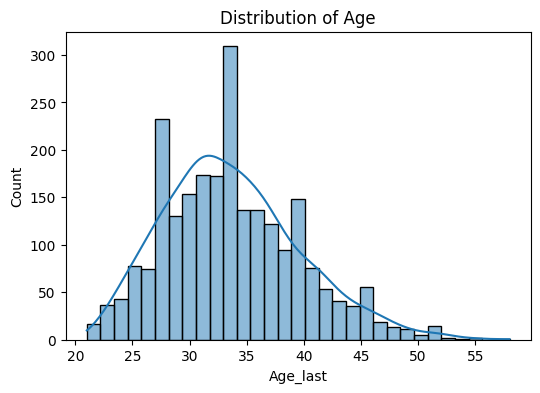

In [35]:
# Histogram for Age
plt.figure(figsize=(6, 4))
sns.histplot(agg_df['Age_last'], kde=True)
plt.title('Distribution of Age')
plt.show()


#### Distribution of Age – Interpretation
The age distribution of drivers is slightly right-skewed, indicating more younger drivers in the dataset.

The most common age group lies between 28 and 35 years, with a sharp peak around 33 years, suggesting this is the core working population for Ola.

Very few drivers are older than 50, which may imply that driver engagement declines with age or that Ola recruits fewer older drivers.

The longer tail on the right indicates a presence of relatively older drivers, but they are outnumbered by younger counterparts.

#### Business Insight:
Ola’s driver base is predominantly young to middle-aged. Retention strategies could be tailored for drivers in their 30s, who represent the largest segment. For older drivers, engagement programs may be needed if they are found to churn more often.

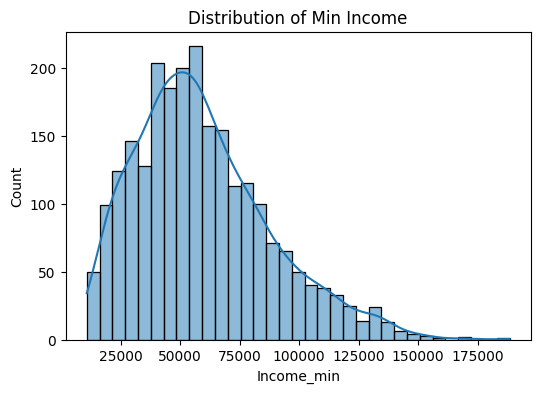

In [38]:
# Histogram for Income (min)
plt.figure(figsize=(6, 4))
sns.histplot(agg_df['Income_min'], kde=True)
plt.title('Distribution of Min Income')
plt.show()


#### Distribution of Minimum Income – Interpretation

The distribution is right-skewed, which is common for income-related data.

The peak income range is between ₹40,000 to ₹60,000, suggesting that most drivers had relatively modest starting incomes.

A significant number of drivers earned between ₹20,000 and ₹80,000 in their lowest-earning months.

A long tail extends beyond ₹100,000, indicating that a small subset of drivers had very high minimum incomes — possibly due to incentives, surge earnings, or anomalies.

No negative values seen, which is good — though we might still check for zero values and rare outliers.

#### Business Insight:
The majority of Ola drivers earn a modest income in their worst-performing months. Drivers with unusually high minimum incomes could be high-performers or outliers. This skewed income distribution highlights the importance of financial stability for retention, especially among drivers with lower baseline earnings.

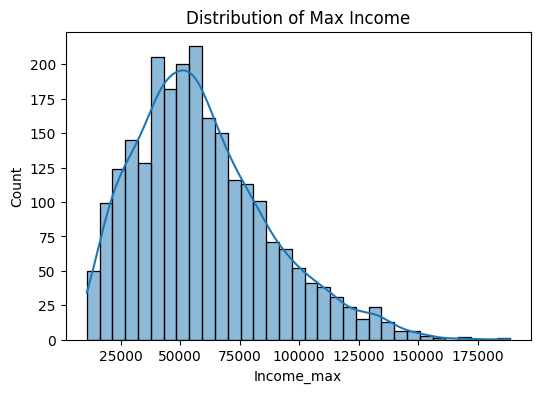

In [41]:
# Histogram for Income (max)
plt.figure(figsize=(6, 4))
sns.histplot(agg_df['Income_max'], kde=True)
plt.title('Distribution of Max Income')
plt.show()


#### Distribution of Maximum Income – Interpretation

The distribution is again right-skewed, similar to the minimum income, but with a broader spread.

The peak lies between ₹45,000 and ₹60,000, suggesting that even at their best, most drivers earn within a moderate range.

A large number of drivers have achieved maximum income between ₹40,000 and ₹90,000.

The tail extends up to ₹175,000, indicating a small segment of top-performing or highly active drivers.

The distribution shape is smoother than Income_min, indicating fewer drivers have abrupt jumps in their highest-earning months.

#### Business Insight:
Most drivers reach their peak income within the ₹50,000–₹90,000 range, reinforcing a performance ceiling. Ola can explore incentive structures or gig optimizations to help drivers push beyond this ceiling. High-performing outliers (earning ₹1L+) may reveal best practices worth promoting across the driver base.

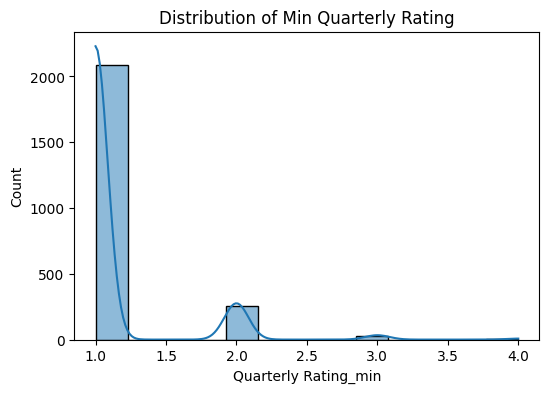

In [44]:
# Histogram for Quarterly Rating (min)
plt.figure(figsize=(6, 4))
sns.histplot(agg_df['Quarterly Rating_min'], kde=True)
plt.title('Distribution of Min Quarterly Rating')
plt.show()


#### Distribution of Minimum Quarterly Rating – Interpretation

The distribution is highly left-skewed, with an overwhelming majority of drivers having a minimum rating of 1.

Very few drivers ever had a minimum rating above 2, and the frequency drops sharply after rating 1.

This suggests that many drivers either started with a low rating or had at least one very poor performance quarter.

The spike at rating = 2 could represent a smaller subset that improved or fluctuated but never dropped to 1.

#### Business Insight:
A large portion of Ola drivers have experienced a minimum rating of 1, possibly due to onboarding struggles or performance dips. Early-stage support, retraining, or mentorship could reduce initial low ratings and improve long-term retention.

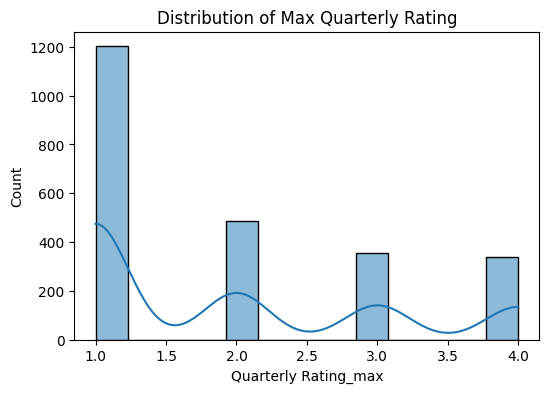

In [47]:
# Histogram for Quarterly Rating (max)
plt.figure(figsize=(6, 4))
sns.histplot(agg_df['Quarterly Rating_max'], kde=True)
plt.title('Distribution of Max Quarterly Rating')
plt.show()


#### Distribution of Maximum Quarterly Rating – Interpretation

Surprisingly, the most frequent max rating is still 1, even though it's the lowest possible score.

There's a progressive decrease in count from rating 2 to 4, but ratings 3 and 4 are present in meaningful numbers.

This suggests that while many drivers never improved beyond a low rating, a notable number did show upward performance trends.

The distribution is flatter than min rating — meaning the dataset contains drivers who reached different performance peaks.

#### Comparison with Min Rating:

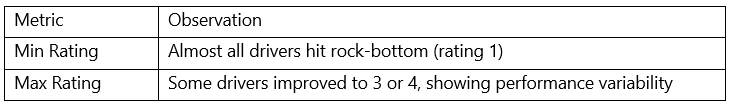

#### Business Insight:
While most drivers have experienced low quarterly ratings, a significant subset shows upward momentum. This highlights the potential of performance-based retention strategies. Identifying and rewarding improvement could reduce attrition among drivers with growth potential.

### Step 8.2: Categorical Count Plots

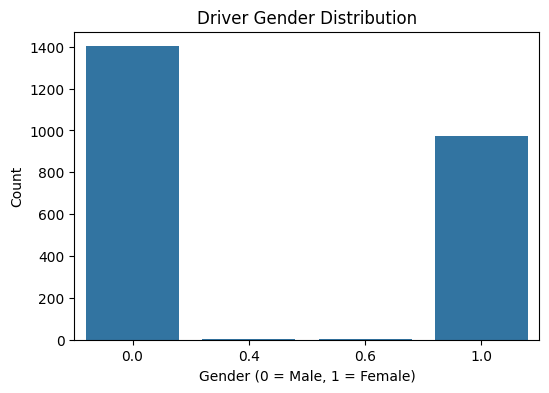

In [52]:
# Gender Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=agg_df, x='Gender_last')
plt.title('Driver Gender Distribution')
plt.xlabel('Gender (0 = Male, 1 = Female)')
plt.ylabel('Count')
plt.show()


#### Driver Gender Distribution – Interpretation
The chart clearly shows a male-dominated workforce.

Gender = 0 (Male) represents the majority with approximately 1.5x more drivers compared to Gender = 1 (Female).

The near-zero count between the two bars suggests no missing or mixed entries, which is good for modeling.



#### Business Insight
Ola's driver base is significantly skewed towards males. While this reflects broader trends in the gig economy and ride-sharing sectors, it also indicates an opportunity to promote inclusivity. Tailored onboarding and safety support programs could help increase female driver participation, improving both diversity and outreach.

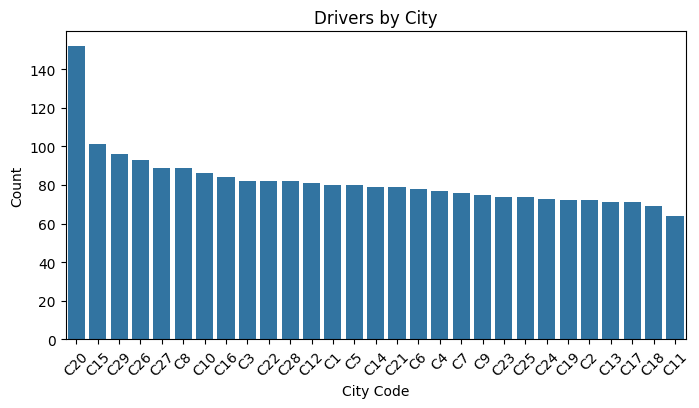

In [55]:
# City-wise Driver Count
plt.figure(figsize=(8, 4))
sns.countplot(data=agg_df, x='City_last', order=agg_df['City_last'].value_counts().index)
plt.title('Drivers by City')
plt.xlabel('City Code')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


#### Drivers by City – Interpretation
City C20 clearly has the highest number of drivers, significantly above others.

The remaining cities show a gradual decline in driver count, with relatively even distribution from city C15 to C11.

The presence of over 25 unique city codes reflects Ola’s broad geographic coverage.

There’s no extreme drop-off, which suggests a balanced strategy across cities — apart from the clear leader.

#### Business Insight
City C20 appears to be a major operational hub or a metro region with higher demand and driver onboarding. This could be a priority area for retention or pilot programs. Meanwhile, cities with moderate driver counts might benefit from targeted acquisition or incentive strategies to maintain healthy supply-demand ratios.

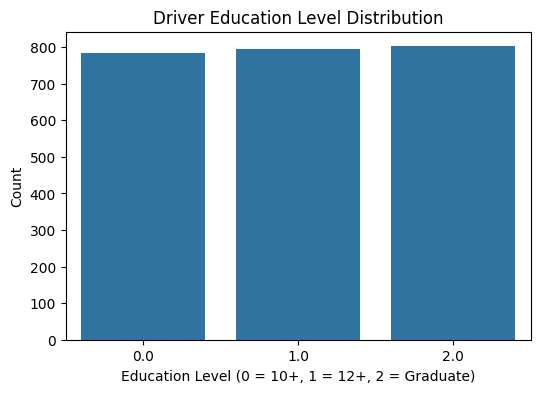

In [58]:
### Education Level
plt.figure(figsize=(6, 4))
sns.countplot(data=agg_df, x='Education_Level_last')
plt.title('Driver Education Level Distribution')
plt.xlabel('Education Level (0 = 10+, 1 = 12+, 2 = Graduate)')
plt.ylabel('Count')
plt.show()


#### Driver Education Level Distribution – Interpretation
The distribution across education levels is very balanced, with all three groups (10+, 12+, Graduate) having nearly equal representation.

Slightly more drivers have a graduate degree (label 2), but the difference is marginal.

This indicates that education level is not a major barrier to joining Ola’s driver workforce.



#### Business Insight
Ola’s driver recruitment strategy appears inclusive across educational backgrounds. However, this also means that education level alone may not be a strong predictor of attrition or performance. Any skill-based training or digital upskilling initiatives could be effectively rolled out across all segments without the need for differentiated learning tiers.



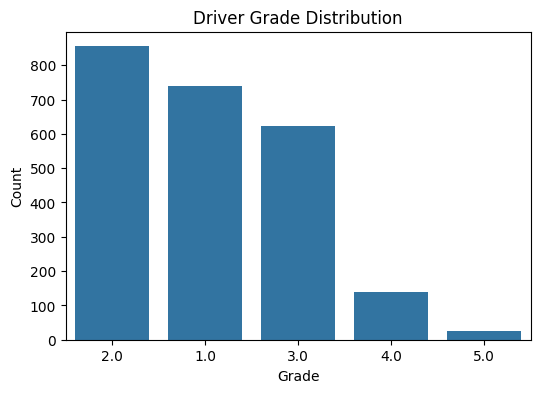

In [61]:
# Grade Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=agg_df, x='Grade_last', order=agg_df['Grade_last'].value_counts().index)
plt.title('Driver Grade Distribution')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.show()


#### Driver Grade Distribution – Interpretation
The distribution is heavily skewed toward lower grades, especially Grade 2, which has the highest count.

Grades 1 to 3 dominate the driver population, making up the vast majority.

Very few drivers are in Grade 4 or 5, indicating that only a small subset reaches higher grades, possibly due to performance thresholds or tenure filters.

The almost negligible count in Grade 5 could signal a promotion bottleneck or under-utilization of grading levels.

#### Business Insight
The current grade distribution shows a heavy reliance on lower-tier drivers. Ola may benefit from investigating why fewer drivers advance to higher grades — is it performance, policy, or retention? Incentivizing grade progression or publicly recognizing high-grade drivers may improve motivation and reduce churn.

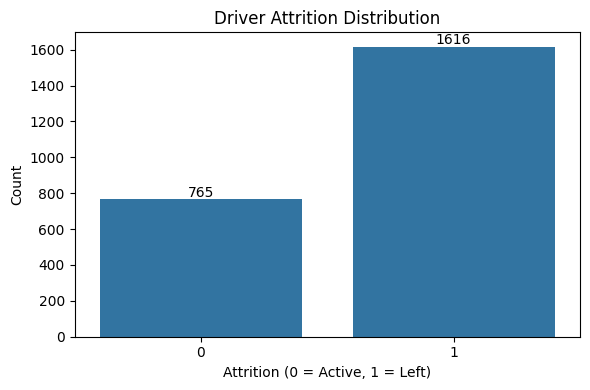

In [64]:
# Attrition Count with Counts on Bars
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=agg_df, x='Attrition')
plt.title('Driver Attrition Distribution')
plt.xlabel('Attrition (0 = Active, 1 = Left)')
plt.ylabel('Count')

# Add counts on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 15,  
            f'{int(height)}', ha="center")

plt.tight_layout()
plt.show()


#### Driver Attrition Distribution – Interpretation
The dataset is imbalanced, with significantly more drivers marked as Attrition = 1 (Left) compared to Attrition = 0 (Active).

Roughly twice as many drivers have left Ola as those who stayed, indicating high churn.

This aligns with the business problem stated: driver attrition is a major concern.

#### Modeling Impact
This imbalance can bias classification models toward predicting the dominant class (i.e., attrition).

Will require class imbalance handling — e.g., SMOTE oversampling or balanced class weights during model training.

#### Business Insight
The high churn rate highlights the need for proactive driver engagement and retention strategies. Early identification of attrition signals and personalized interventions could significantly reduce this loss, especially given the cost of acquiring new drivers.

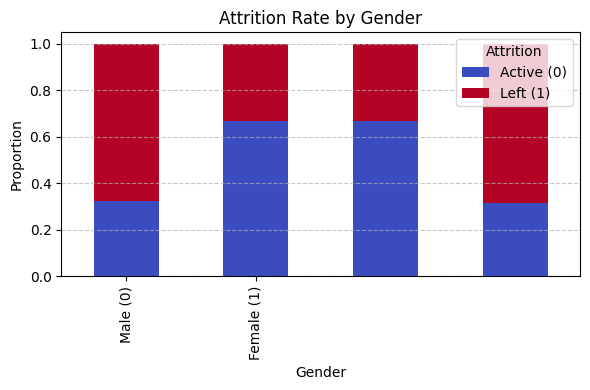

In [68]:
# Crosstab (normalized)
attrition_by_gender = pd.crosstab(
    agg_df['Gender_last'], 
    agg_df['Attrition'], 
    normalize='index'
)

# Plot
ax = attrition_by_gender.plot(kind='bar', stacked=True, figsize=(6, 4), colormap='coolwarm')

# Formatting
plt.title("Attrition Rate by Gender")
plt.xlabel("Gender")
plt.ylabel("Proportion")
plt.xticks(ticks=[0, 1], labels=['Male (0)', 'Female (1)'])  # Fixes tick labels
plt.legend(title="Attrition", labels=['Active (0)', 'Left (1)'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Two bars which do not have any gender are investigated further. It is found out that, there were 52 missing values in Gender column in the original data. while imputing using KNN imputer, some non o and non 1 numbers are generated. These will be removed in the subsequent steps.


In [70]:
print("Unique values in Gender_last:")
print(agg_df['Gender_last'].unique())


Unique values in Gender_last:
[0.  1.  0.6 0.4]


In [71]:
print("Gender value counts:")
print(agg_df['Gender_last'].value_counts(dropna=False))


Gender value counts:
Gender_last
0.0    1402
1.0     973
0.6       3
0.4       3
Name: count, dtype: int64


In [72]:
# sanity check


In [73]:
# Quick check for unique values in all categorical features
for col in ['Gender', 'City', 'Education_Level', 'Grade']:
    print(f"Unique values in {col}: {df[col].unique()}")


Unique values in Gender: [0.  1.  0.6 0.4 0.2 0.8]
Unique values in City: ['C23' 'C7' 'C13' 'C9' 'C11' 'C2' 'C19' 'C26' 'C20' 'C17' 'C29' 'C10'
 'C24' 'C14' 'C6' 'C28' 'C5' 'C18' 'C27' 'C15' 'C8' 'C25' 'C21' 'C1' 'C4'
 'C3' 'C16' 'C22' 'C12']
Unique values in Education_Level: [2. 0. 1.]
Unique values in Grade: [1. 2. 3. 4. 5.]


In [74]:
# Assuming you've already filtered agg_df to include only gender values 0 and 1
gender_counts = agg_df['Gender_last'].value_counts(normalize=True) * 100
print("Gender Distribution (%):")
print(gender_counts.round(2))


Gender Distribution (%):
Gender_last
0.0    58.88
1.0    40.87
0.6     0.13
0.4     0.13
Name: proportion, dtype: float64


In [75]:
# Filter only valid gender values
filtered_df = agg_df[agg_df['Gender_last'].isin([0.0, 1.0])]

# Calculate proportions
gender_counts = filtered_df['Gender_last'].value_counts(normalize=True) * 100
gender_counts = gender_counts.round(2)

print("Gender Distribution (%):")
print(gender_counts)


Gender Distribution (%):
Gender_last
0.0    59.03
1.0    40.97
Name: proportion, dtype: float64


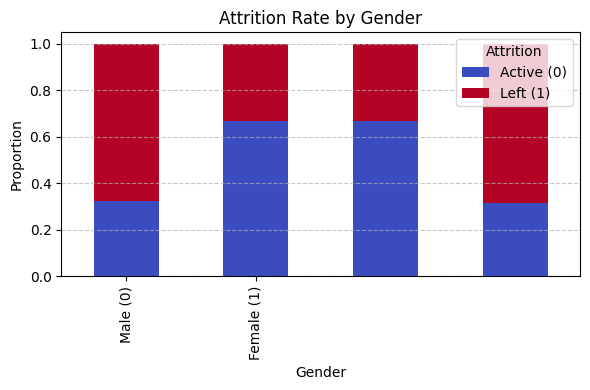

In [76]:
# Crosstab (normalized)
attrition_by_gender = pd.crosstab(
    agg_df['Gender_last'], 
    agg_df['Attrition'], 
    normalize='index'
)

# Plot
ax = attrition_by_gender.plot(kind='bar', stacked=True, figsize=(6, 4), colormap='coolwarm')

# Formatting
plt.title("Attrition Rate by Gender")
plt.xlabel("Gender")
plt.ylabel("Proportion")
plt.xticks(ticks=[0, 1], labels=['Male (0)', 'Female (1)'])  # Fixes tick labels
plt.legend(title="Attrition", labels=['Active (0)', 'Left (1)'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#### Interpretation
Ola's driver base is predominantly male (59%), but with a significant 41% female representation, which is relatively high for a gig economy segment. This opens up meaningful room for gender-specific analysis and targeted retention strategies.

### Step 8.3: Bivariate Analysis.

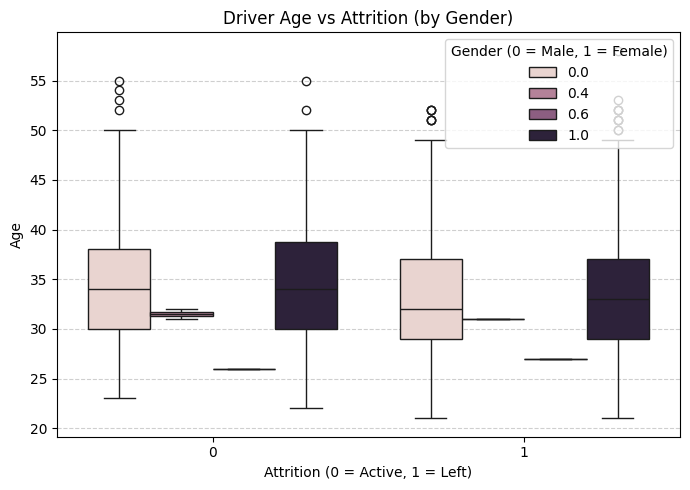

In [79]:
# Age vs Attrition (Split by Gender)
plt.figure(figsize=(7, 5))
sns.boxplot(data=agg_df, x='Attrition', y='Age_last', hue='Gender_last')
plt.title('Driver Age vs Attrition (by Gender)')
plt.xlabel('Attrition (0 = Active, 1 = Left)')
plt.ylabel('Age')
plt.legend(title='Gender (0 = Male, 1 = Female)', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [80]:
agg_df = agg_df[agg_df['Gender_last'].isin([0.0, 1.0])]
agg_df['Gender_last'] = agg_df['Gender_last'].astype(int)


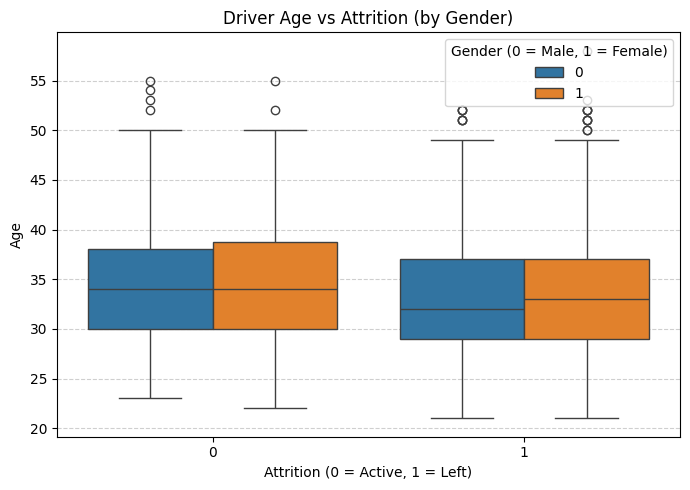

In [81]:
plt.figure(figsize=(7, 5))
sns.boxplot(data=agg_df, x='Attrition', y='Age_last', hue='Gender_last')
plt.title('Driver Age vs Attrition (by Gender)')
plt.xlabel('Attrition (0 = Active, 1 = Left)')
plt.ylabel('Age')
plt.legend(title='Gender (0 = Male, 1 = Female)', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


#### Interpretation: Driver Age vs Attrition (by Gender)
Common Patterns (Male & Female)
Median age of drivers who left (Attrition = 1) is slightly lower than those who stayed (Attrition = 0).

Both male and female drivers show similar IQRs (~28 to 38).

Outliers above age 50 are rare but present in both groups.

Male Drivers (Blue)
Slight tendency for younger male drivers to leave more often.

Male attrition group shows slightly more lower-age outliers than the retained group.

Female Drivers (Orange)
Similar spread and median, but attrition box looks slightly more compressed, suggesting less age variability among females who left.

No strong skew or outlier influence — suggesting age may be less of a factor in female attrition compared to males.

#### Business Insight
Across genders, younger drivers are more likely to leave, but the effect appears slightly stronger among males. Retention efforts could focus on young male drivers, perhaps by promoting career progression, milestone bonuses, or goal-based incentives. Meanwhile, for female drivers, non-age factors (e.g., safety, flexibility) might be more critical.

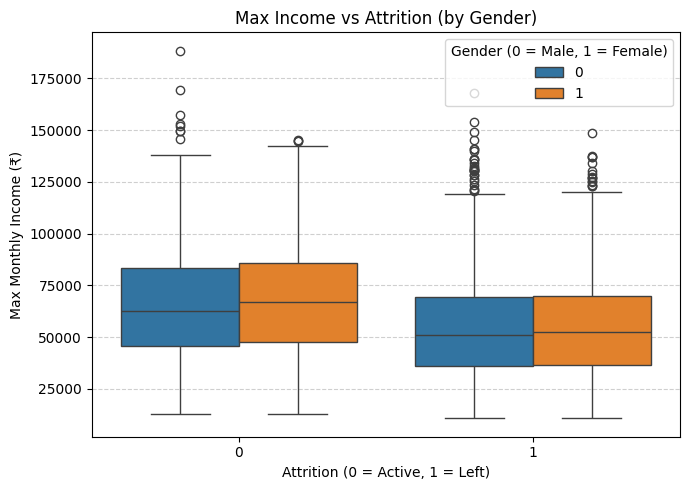

In [84]:
# Income vs Attrition by Gender
plt.figure(figsize=(7, 5))
sns.boxplot(data=agg_df, x='Attrition', y='Income_max', hue='Gender_last')
plt.title('Max Income vs Attrition (by Gender)')
plt.xlabel('Attrition (0 = Active, 1 = Left)')
plt.ylabel('Max Monthly Income (₹)')
plt.legend(title='Gender (0 = Male, 1 = Female)', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



#### Interpretation: Max Income vs Attrition by Gender
Male Drivers (Blue)
Median income is higher for drivers who stayed (Attrition = 0) than those who left.

There's a wider income spread among retained males, suggesting high performers tend to stick around.

Attrited males show a lower upper quartile and more concentration in the ₹30k–₹70k range.

Female Drivers (Orange)
The median max income is slightly lower than males in both groups.

Females who left show slightly less income spread than those who stayed.

However, both groups have outliers reaching ₹120k–₹145k, showing that some high-income females still churned.

##### Overall
Both genders show lower median max income in the attrited group.

The retained population shows higher income variability, particularly for males.



#### Business Insight
Drivers with higher max incomes are more likely to stay, particularly among males. This suggests that income potential is a strong retention driver. For female drivers, income plays a role too, but non-monetary factors may also influence churn. Ola could implement performance-linked loyalty bonuses, especially for middle-income male drivers at risk of churn.

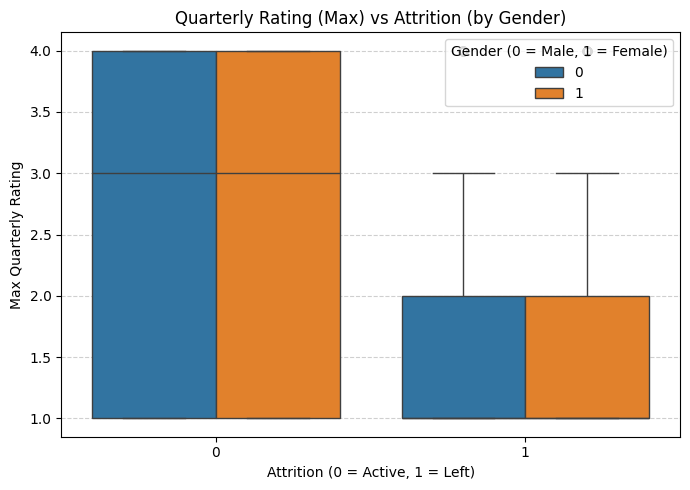

In [87]:
# Quarterly Rating (Max) vs Attrition by Gender
plt.figure(figsize=(7, 5))
sns.boxplot(data=agg_df, x='Attrition', y='Quarterly Rating_max', hue='Gender_last')
plt.title('Quarterly Rating (Max) vs Attrition (by Gender)')
plt.xlabel('Attrition (0 = Active, 1 = Left)')
plt.ylabel('Max Quarterly Rating')
plt.legend(title='Gender (0 = Male, 1 = Female)', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


#### Interpretation
##### Clear Performance Signal:

Active drivers (Attrition = 0):
Most have a higher maximum rating, predominantly around 3 to 4.

Attrited drivers (Attrition = 1):
Ratings are generally lower — mostly 1 to 2, with some up to 3.
This suggests a strong correlation between poor performance and attrition.

##### Gender Comparison:

The distributions are nearly identical across gender.

Both male and female attrited drivers show similar low-performance patterns.

No major gender-based bias is visible in how Ola’s ratings relate to attrition.

#### Business Insights
##### Performance-Linked Churn:
Drivers with consistently low performance ratings are significantly more likely to leave Ola — possibly due to demotivation, lower incentives, or corrective actions from the platform.

##### Opportunity for Intervention:
Consider setting up early alerts for drivers with max quarterly ratings of 1 or 2 — offer retraining, performance coaching, or incentive tweaks to reduce churn risk.

##### Gender-Neutral Patterns:
Since the rating-to-attrition trend holds irrespective of gender, performance improvement programs can be uniformly designed, focusing on behavior and service quality rather than demographics.

In [90]:
print(df.columns.tolist())


['Unnamed: 0', 'MMM-YY', 'Driver_ID', 'Age', 'Gender', 'City', 'Education_Level', 'Income', 'Dateofjoining', 'LastWorkingDate', 'Joining Designation', 'Grade', 'Total Business Value', 'Quarterly Rating']


In [91]:
#### Step 8.4 

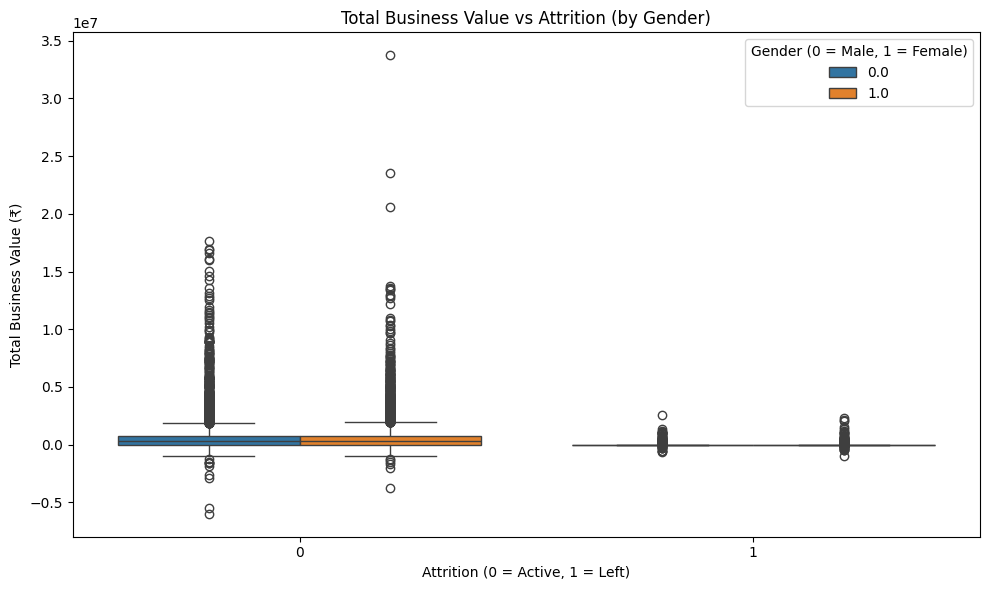

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Create Attrition column if not already present
df['Attrition'] = df['LastWorkingDate'].notna().astype(int)  # 1 = Left, 0 = Active

# Step 2: Filter valid gender and non-null TBV
df_clean_tbv = df[df['Gender'].isin([0, 1])][['Attrition', 'Gender', 'Total Business Value']].dropna()

# Step 3: Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='Total Business Value', hue='Gender', data=df_clean_tbv)
plt.title('Total Business Value vs Attrition (by Gender)')
plt.xlabel('Attrition (0 = Active, 1 = Left)')
plt.ylabel('Total Business Value (₹)')
plt.legend(title='Gender (0 = Male, 1 = Female)')
plt.tight_layout()
plt.show()


#### Plot: Total Business Value vs Attrition (by Gender)
##### Insights:
Skewed Distribution with Heavy Outliers:

There are extreme outliers in Total Business Value (TBV), going beyond ₹3 crores.

These outliers affect visibility of the core distribution (box) and might mask group-level differences.

##### Comparison by Attrition:

Active Drivers (Attrition = 0):

Median TBV appears slightly higher than those who left (Attrition = 1).

Wider IQR (Interquartile Range) suggests greater variability among retained drivers.

##### Drivers Who Left (Attrition = 1):

Lower median TBV, narrower IQR, indicating these drivers contributed relatively less overall.

##### Gender-wise Patterns:

Both male and female drivers show similar patterns in each attrition group.

No significant gender gap is visually evident in TBV contribution within attrition classes.

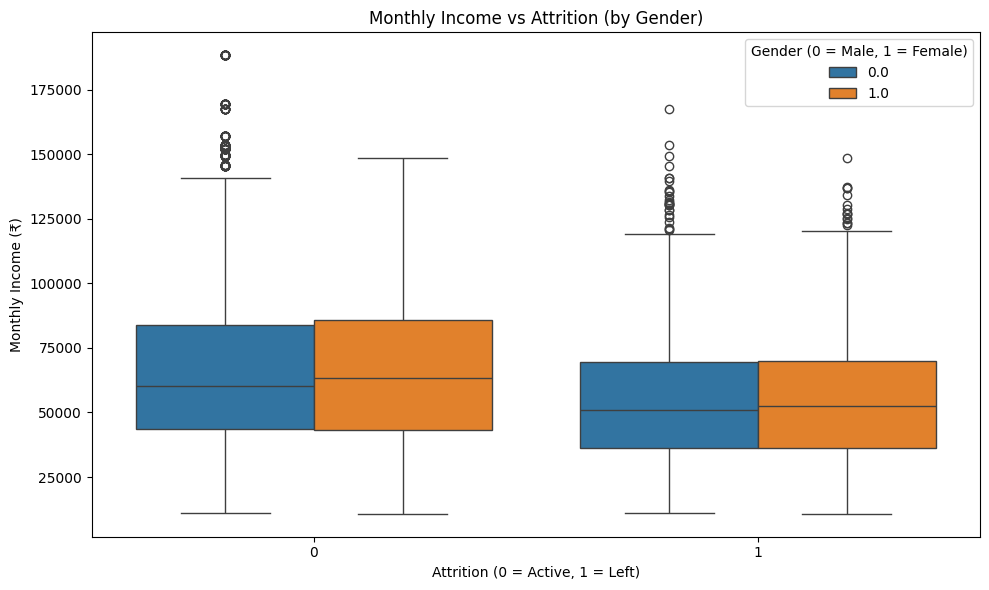

In [94]:
# Create Attrition_last and Gender_last 
df['Attrition_last'] = df['LastWorkingDate'].notnull().astype(int)
df['Gender_last'] = df['Gender']  # assuming Gender column is already numeric (0, 1)

# Filter and plot
df_clean_income = df[df['Gender_last'].isin([0, 1])][['Attrition_last', 'Gender_last', 'Income']].dropna()

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition_last', y='Income', hue='Gender_last', data=df_clean_income)
plt.title('Monthly Income vs Attrition (by Gender)')
plt.xlabel('Attrition (0 = Active, 1 = Left)')
plt.ylabel('Monthly Income (₹)')
plt.legend(title='Gender (0 = Male, 1 = Female)')
plt.tight_layout()
plt.show()


#### Insights from the Boxplot:
##### Attrition = 0 (Active drivers):

Median income is slightly higher for female drivers compared to male.

Both genders have wider income spread, with males showing slightly more variability.

#####  Attrition = 1 (Drivers who left):

Median incomes have dropped compared to active drivers.

Both genders again show lower and narrower distributions, suggesting income might be a factor in attrition.

Outliers: Quite a few, but we’re retaining them.

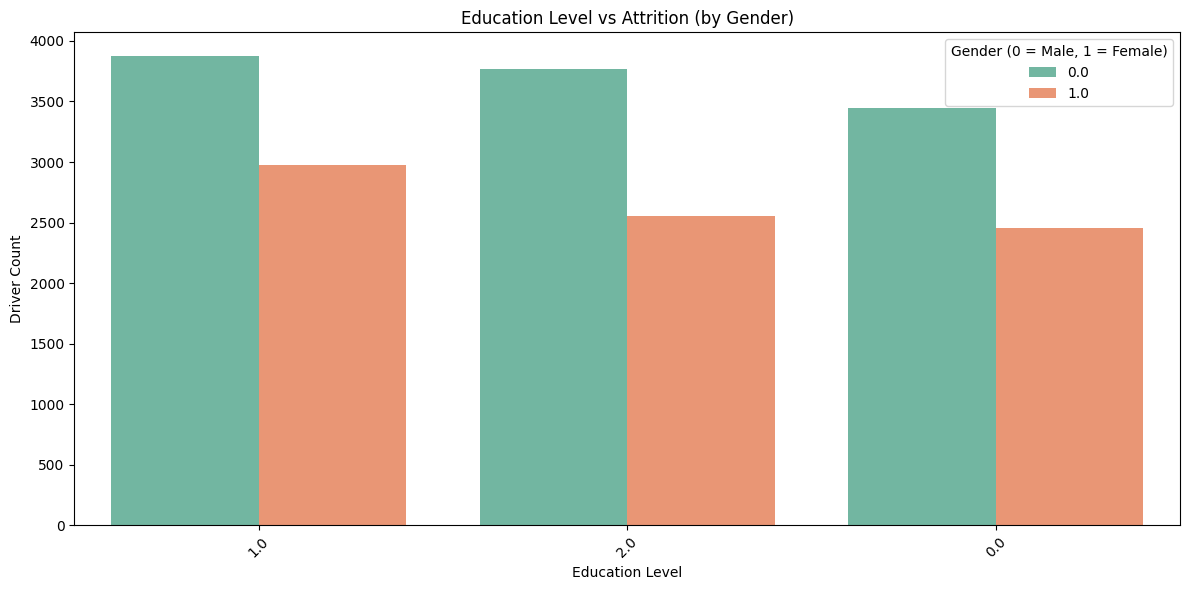

In [96]:
# Education Level vs Attrition (by Gender)
import matplotlib.pyplot as plt
import seaborn as sns

# Filter valid Gender values and non-null Education Level
df_clean_edu = df[df['Gender'].isin([0, 1])][['Gender', 'Education_Level', 'Attrition_last']].dropna()

plt.figure(figsize=(12, 6))
sns.countplot(data=df_clean_edu, x='Education_Level', hue='Gender', palette='Set2',
              hue_order=[0.0, 1.0],  # Male, Female
              order=df_clean_edu['Education_Level'].value_counts().index,
              dodge=True)

plt.title('Education Level vs Attrition (by Gender)')
plt.xlabel('Education Level')
plt.ylabel('Driver Count')
plt.legend(title='Gender (0 = Male, 1 = Female)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Business Insights
##### Attrition occurs across all education levels:

Drivers from all education backgrounds, including higher levels, are leaving the platform.

Education level alone does not appear to be a strong deterrent against attrition.

##### Male drivers dominate across education levels:

For every education level, the male attrition count is higher.

This could be due to higher male representation in the workforce — worth confirming via gender distribution.

##### Female attrition is not negligible:

Though lower in count, female attrition is consistent across levels — indicating that retention strategies should be gender-inclusive, especially in education level 1.0 and 2.0.

##### No sharp drop-off at a particular education level:

Attrition does not spike or plummet drastically with increasing education.

This implies other factors (income, satisfaction, city, etc.) may have stronger impact than education level alone.



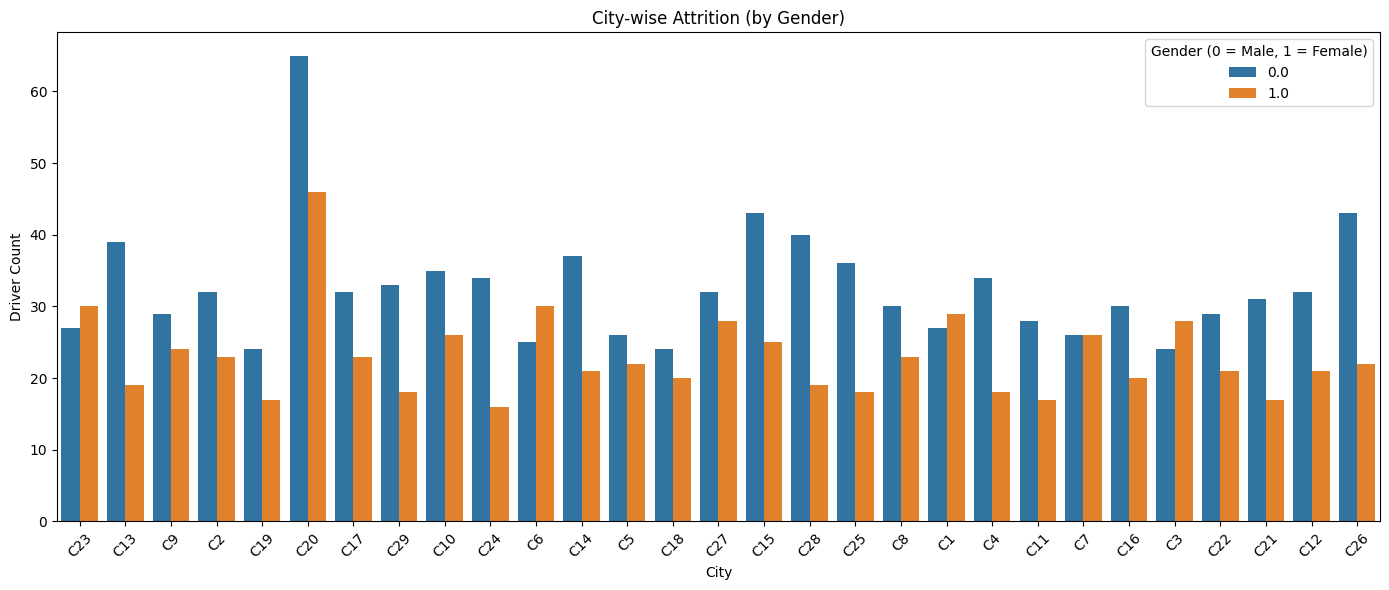

In [98]:
# City vs Attrition (by Gender)
import matplotlib.pyplot as plt
import seaborn as sns

# Clean and filter relevant columns
df_clean_city = df[df['Gender'].isin([0, 1])][['City', 'Attrition', 'Gender']].dropna()

plt.figure(figsize=(14, 6))
sns.countplot(x='City', hue='Gender', data=df_clean_city[df_clean_city['Attrition'] == 1])

plt.title('City-wise Attrition (by Gender)')
plt.xlabel('City')
plt.ylabel('Driver Count')
plt.xticks(rotation=45)
plt.legend(title='Gender (0 = Male, 1 = Female)')
plt.tight_layout()
plt.show()


#### Plot Interpretation – City-wise Attrition (by Gender)
X-axis: City codes (C1 to C27)

Y-axis: Number of drivers who left (i.e., Attrition = 1)

Hue: Gender (0 = Male, 1 = Female)



#### Key Observations
City C20 has the highest attrition overall — both for male and female drivers.

In almost every city, male attrition is consistently higher than female attrition, suggesting:

Either more male drivers were employed originally.

Or male drivers tend to leave the platform more frequently.

Some cities show relatively balanced attrition (e.g., C1, C7, C16), where male-female attrition gap is small.

Cities like C13, C26, C15, and C14 show noticeably higher male attrition than female — potential hotspots for gender-focused interventions

#### Business Insights
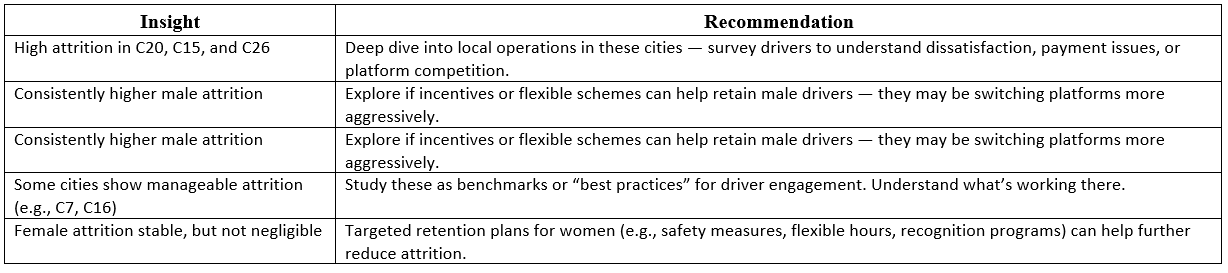

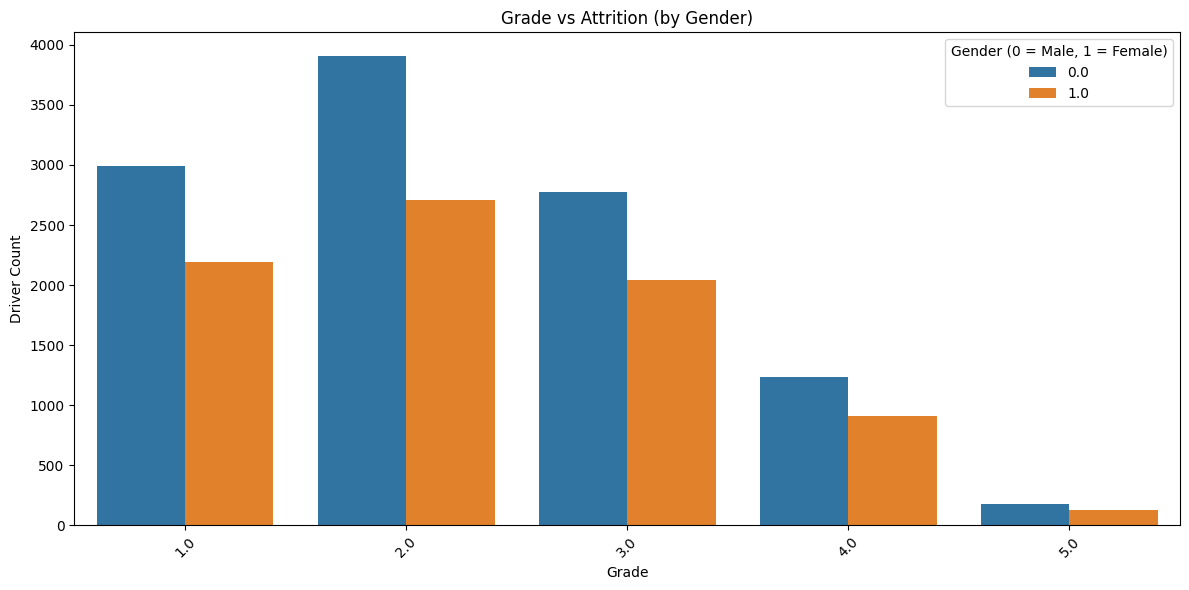

In [102]:
# Grade vs Attrition (by Gender)
import matplotlib.pyplot as plt
import seaborn as sns

# Clean data: keep rows with valid Gender and non-null Grade
df_clean_grade = df[df['Gender'].isin([0, 1]) & df['Grade'].notna()]

plt.figure(figsize=(12, 6))
sns.countplot(data=df_clean_grade, x='Grade', hue='Gender')
plt.title('Grade vs Attrition (by Gender)')
plt.xlabel('Grade')
plt.ylabel('Driver Count')
plt.legend(title='Gender (0 = Male, 1 = Female)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Interpretation: Grade vs Attrition (by Gender)
##### Grade Distribution:

Grades range from 1.0 to 5.0, where Grade 2.0 has the highest number of drivers, followed by Grade 1.0 and 3.0.

Grade 5.0 has the least representation for both genders.

##### Gender Split:

Across all grades, male drivers (0) consistently outnumber female drivers (1).

The relative distribution pattern between genders remains fairly consistent across grades.

##### Attrition Insight (Implied):

Although this plot does not directly show attrition status, since we are analyzing drivers (active + left), we can pair this with attrition status later.

##### It’s reasonable to hypothesize:

Lower grades (1.0, 2.0) likely represent newer or lower-performing drivers.

Higher attrition might be concentrated in Grade 1.0 and 2.0 — we can confirm that in a follow-up analysis with an Attrition overlay.



#### Business Insights
Focus Retention Efforts on Grade 1.0 and 2.0: These grades form the bulk of the driver base. Retaining drivers in these grades can significantly reduce overall churn.

Upskilling/Training Programs: Drivers in Grade 1.0 and 2.0 may benefit from training programs to help them move up the grading ladder, improving retention and performance.

Female Representation: Female drivers are consistently fewer across all grades, suggesting potential for inclusive hiring strategies and gender diversity programs.

Grade as a Segmentation Feature: The clear stratification makes Grade a strong candidate for segmentation in churn modeling or for designing tiered incentive plans.

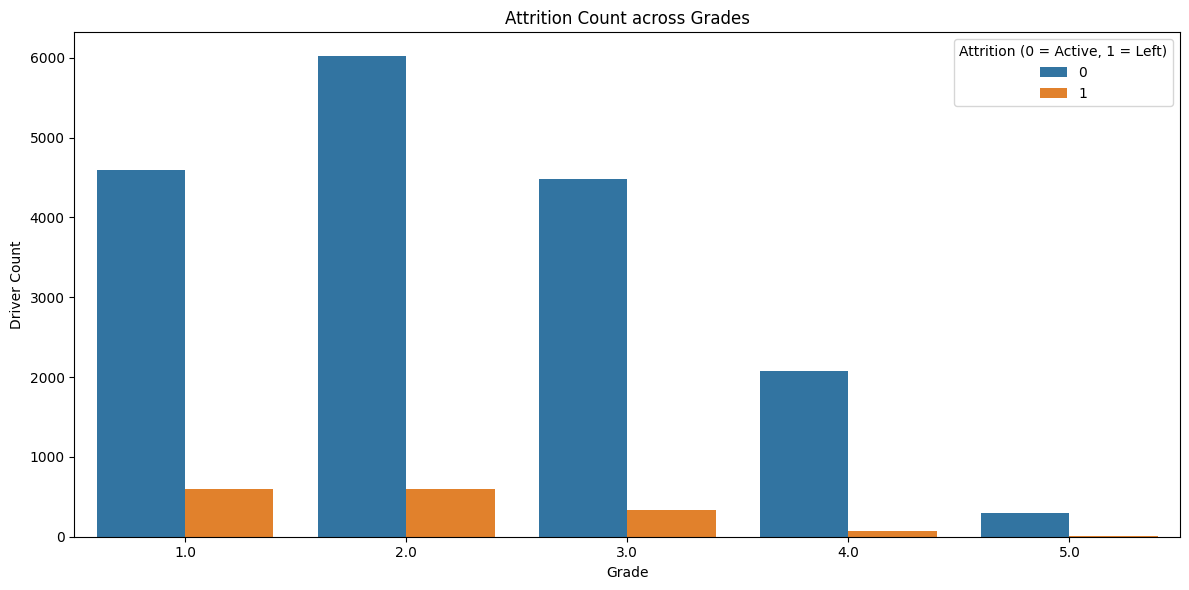

In [105]:
# Attrition vs Grade
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for valid grades and attrition values
df_grade_attr = df[df['Gender'].isin([0, 1]) & df['Grade'].notna()]

plt.figure(figsize=(12, 6))
sns.countplot(data=df_grade_attr, x='Grade', hue='Attrition')

plt.title('Attrition Count across Grades')
plt.xlabel('Grade')
plt.ylabel('Driver Count')
plt.legend(title='Attrition (0 = Active, 1 = Left)')
plt.tight_layout()
plt.show()


#### Plot Interpretation:
Grades 1, 2, and 3 have the highest overall driver count.

##### However, Attrition (orange bars) is:

Most visible in Grade 1 and Grade 2.

Relatively low or negligible in Grades 4 and 5.

Grade 2 has the highest count of active drivers, but attrition in this grade is also one of the highest in absolute terms.



#### Business Insights:
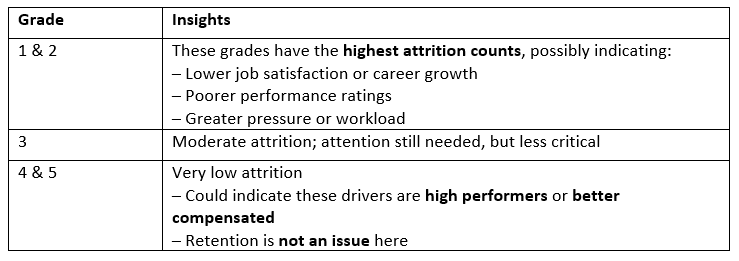

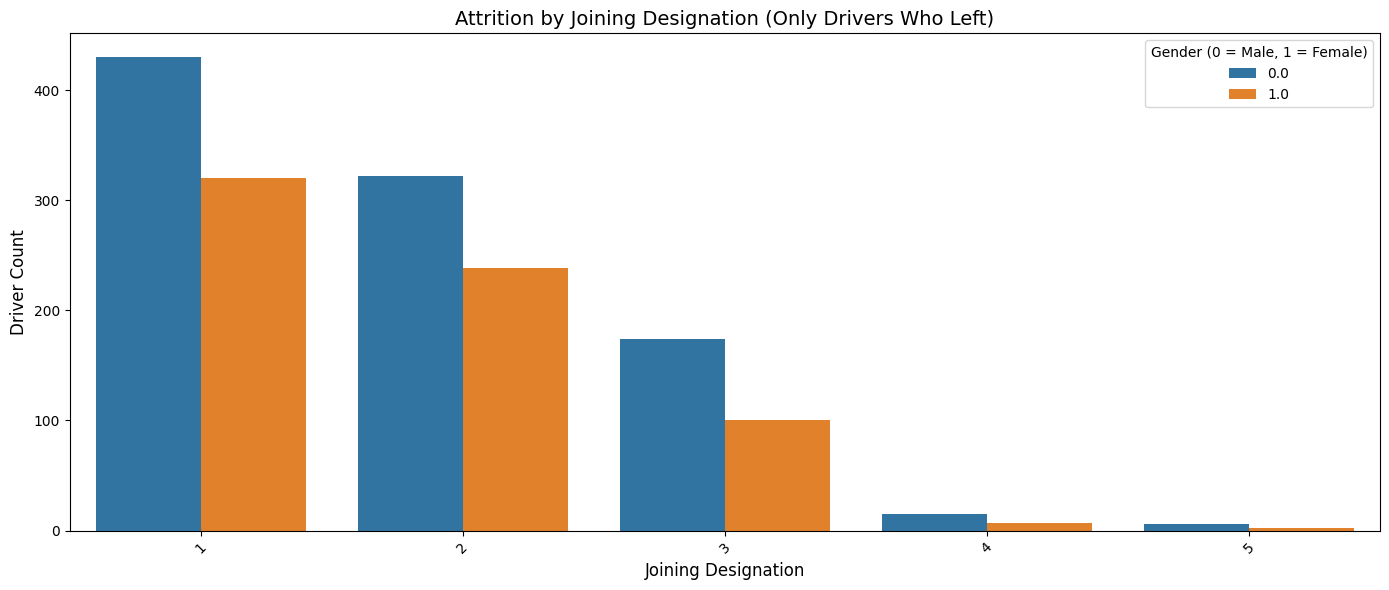

In [108]:
# Attrition vs Joining Designation (with Gender hue)
import matplotlib.pyplot as plt
import seaborn as sns

# Clean and filter the data
df_clean_jd = df[df['Gender'].isin([0, 1])][['Joining Designation', 'Attrition', 'Gender']].dropna()

# Convert to int for better plotting
df_clean_jd['Joining Designation'] = df_clean_jd['Joining Designation'].astype(int)

# Set plot size
plt.figure(figsize=(14, 6))

# Plot
sns.countplot(x='Joining Designation', hue='Gender', data=df_clean_jd[df_clean_jd['Attrition'] == 1])

# Title and labels
plt.title('Attrition by Joining Designation (Only Drivers Who Left)', fontsize=14)
plt.xlabel('Joining Designation', fontsize=12)
plt.ylabel('Driver Count', fontsize=12)
plt.legend(title='Gender (0 = Male, 1 = Female)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Interpretation:
##### Drivers starting at Designation 1 and 2 may be at entry-level or lower-responsibility roles, which could contribute to higher attrition due to:

Fewer benefits or incentives

Limited growth opportunities

More strenuous or unrewarding tasks

##### As designation increases, attrition significantly decreases, possibly indicating that:

These roles come with better pay, status, or retention incentives

Selection or promotion to higher designations may involve filters that ensure better job-fit

#### Business Insights:
##### Critical Designations to Focus On:

Designation 1 and 2 represent over 80–90% of the attrition volume. Retention strategies should prioritize drivers in these groups.

Design Role Redesign or Progression Path:

Review job satisfaction, pay, and work conditions at Designation 1 and 2.

Introduce clear progression tracks from these designations to higher roles (e.g., designation-linked incentives).

Gender-Based Targeting:

While both genders exhibit similar patterns, the male driver segment still dominates attrition. This may justify tailored gender-specific retention programs or benefits.

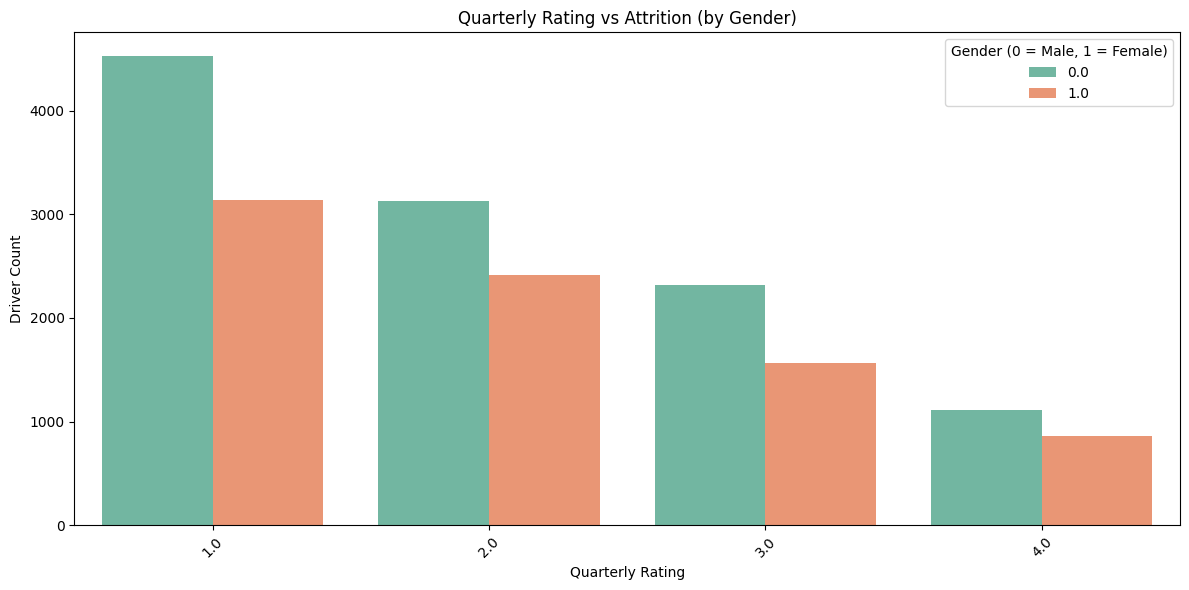

In [111]:
# Quarterly Rating vs Attrition (by Gender)
# Step 6.1 – Prepare data
df_clean_rating = df[df['Gender'].isin([0, 1])][['Attrition', 'Gender', 'Quarterly Rating']].dropna()

# Step 6.2 – Plotting
plt.figure(figsize=(12, 6))
sns.countplot(
    data=df_clean_rating,
    x='Quarterly Rating',
    hue='Gender',
    palette='Set2'
)

plt.title('Quarterly Rating vs Attrition (by Gender)')
plt.xlabel('Quarterly Rating')
plt.ylabel('Driver Count')
plt.legend(title='Gender (0 = Male, 1 = Female)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Observations & Interpretations:
##### Most Drivers Rated 1:

Both male and female drivers are most commonly rated as 1 on their quarterly performance.

This group has the highest driver count among all ratings.

##### Driver Count Decreases with Higher Ratings:

There is a clear downward trend in the number of drivers as the rating increases from 1 to 4.

This likely reflects a performance bottleneck, where very few drivers reach higher ratings.

##### Gender Distribution Across Ratings:

Across all ratings, male drivers outnumber female drivers, consistent with prior gender-based plots.

The gender gap slightly narrows at higher ratings (Ratings 3 and 4).

##### Performance and Attrition Linkage:

Although this chart shows total driver counts (not explicitly attrition), combining this with your earlier “Attrition vs Grade” or “Joining Designation” plots suggests:

Low-rated drivers (Rating 1) may be more prone to attrition, possibly due to low satisfaction or underperformance.

High-performing drivers (Ratings 3 & 4) are relatively fewer, possibly indicating a retention challenge for top talent or a strict evaluation system.



#### Business Insights:
##### What This Means for Ola:
##### Low Ratings Are Widespread:

A majority of drivers consistently receive a performance rating of 1 or 2. This could be due to:

Lack of clear KPIs.

Inadequate training/support.

High performance expectations.

##### Performance-Based Attrition Risk:

If low-rated drivers are leaving more, it's a sign of disengagement or dissatisfaction.

Conversely, if high-performing drivers are leaving, it’s a red flag for talent retention.

##### Gender Equity in Ratings:

No major rating bias is evident across genders, which is a positive signal.

However, the lower number of female drivers across ratings suggests female workforce participation is lower overall.



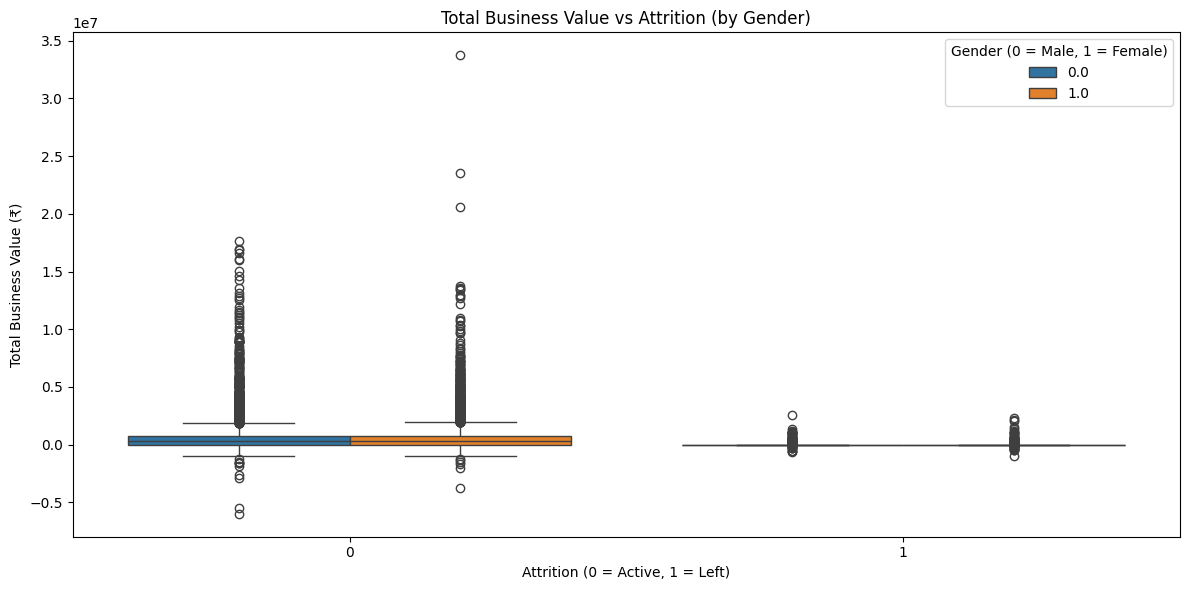

In [114]:
# Total Business Value vs Attrition (by Gender)
import matplotlib.pyplot as plt
import seaborn as sns

# Clean the data
df_clean_tbv = df[df['Gender'].isin([0, 1])][['Attrition', 'Gender', 'Total Business Value']].dropna()

# Plot: Total Business Value vs Attrition (by Gender)
plt.figure(figsize=(12, 6))
sns.boxplot(x='Attrition', y='Total Business Value', hue='Gender', data=df_clean_tbv)
plt.title('Total Business Value vs Attrition (by Gender)')
plt.xlabel('Attrition (0 = Active, 1 = Left)')
plt.ylabel('Total Business Value (₹)')
plt.legend(title='Gender (0 = Male, 1 = Female)')
plt.tight_layout()
plt.show()


#### Observations and Interpretation:
##### Active Drivers (Attrition = 0):

Higher TBV overall for both genders.

Male drivers have a wider spread and more extreme positive outliers, indicating some males are top contributors to business.

Female drivers also show healthy TBV but with slightly lower median and spread than males.

##### Drivers Who Left (Attrition = 1):

TBV is significantly lower for both genders.

Distribution is much tighter, and upper outliers are rare, meaning high-contributing drivers are less likely to leave.

Male drivers who left show slightly more outliers than female counterparts.

##### Clear Skew and Outliers:

TBV has strong positive skew (long right tail), suggesting a small number of drivers contribute disproportionately high business value.

These high contributors are mostly still active.



#### Business Insights
##### Retention of High-Value Drivers:

High TBV drivers are largely retained, especially males.

This implies Ola's existing incentive or engagement strategies may be effective for top contributors — but continued monitoring and reward-based retention is key.

##### Low TBV and Attrition:

Drivers with lower TBV are more prone to attrition, suggesting either dissatisfaction or lack of engagement/earnings.

Tailored support/training programs or revised payout structures may help improve retention in this segment.

##### Gender Perspective:

Both male and female drivers who left contribute less TBV.

However, since the median TBV for active females is lower than males, consider exploring if systemic factors (e.g., fewer trip assignments, shorter routes) are contributing.

##### Actionable Segmenting:

Segment drivers based on TBV tiers and design tier-specific retention strategies — e.g. bonus slabs, performance coaching, or flexible scheduling.

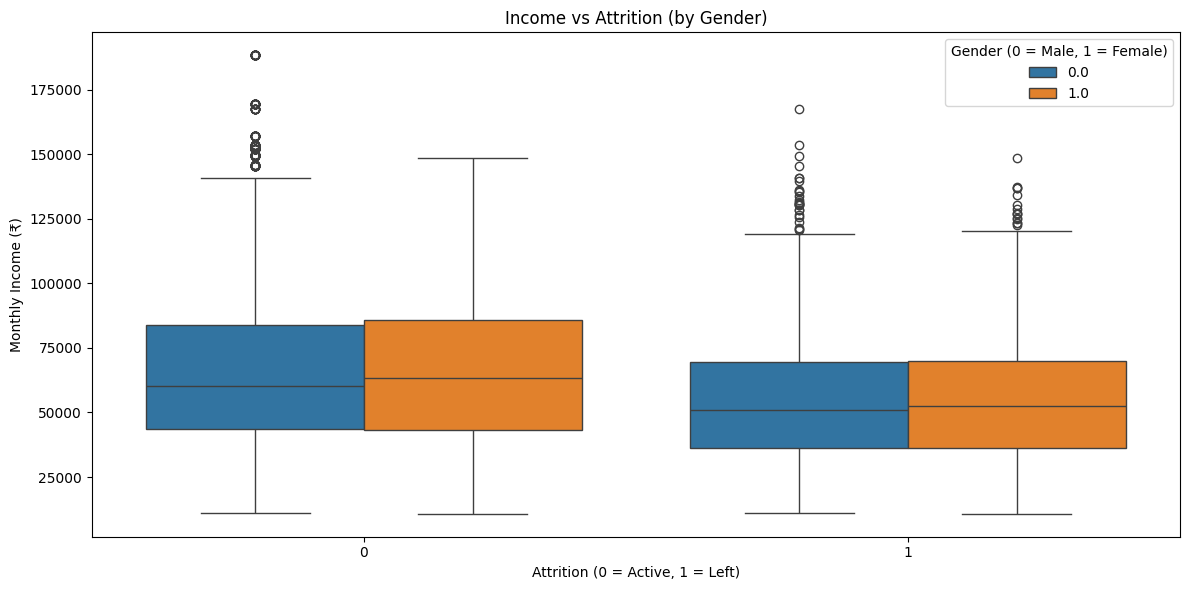

In [117]:
# Income vs Attrition (by Gender)
import matplotlib.pyplot as plt
import seaborn as sns

# Clean the data
df_clean_income = df[df['Gender'].isin([0, 1])][['Attrition', 'Gender', 'Income']].dropna()

# Plot: Income vs Attrition (by Gender)
plt.figure(figsize=(12, 6))
sns.boxplot(x='Attrition', y='Income', hue='Gender', data=df_clean_income)
plt.title('Income vs Attrition (by Gender)')
plt.xlabel('Attrition (0 = Active, 1 = Left)')
plt.ylabel('Monthly Income (₹)')
plt.legend(title='Gender (0 = Male, 1 = Female)')
plt.tight_layout()
plt.show()


#### Key Observations & Insights:
Income Levels Are Lower for Attrited Drivers

Median income for drivers who left (Attrition = 1) is significantly lower than that of active drivers (Attrition = 0), across both genders.

This suggests lower income may be a driver of attrition.

Gender Patterns Are Similar

Both male and female drivers show similar income distribution patterns for attrition.

No major gender disparity in income across attrition groups, though female income seems slightly more compressed (less variability).

Wide Income Range Among Active Drivers

Active drivers show greater variability in income, especially among males.

Some drivers are earning well over ₹1.5L/month and are still retained — indicating performance-based incentives may be working.

Outliers Exist

There are high-income outliers, mostly among active drivers.

As previously discussed, we are keeping them for now, but they do reflect a performance tier that could be targeted for retention best practices.



#### Business Insights & Recommendations
Low-Income Drivers Are More Likely to Leave
Introduce minimum earning guarantees or floor incentives to support the bottom income quartile, especially during off-peak months.

No Significant Gender Disparity
Genderwise, income driven attrition does not suggest bias: so interventions can remain income-focused, not gender-targeted.

Recognize and Retain High Performers
Consider introducing loyalty bonuses or growth paths for high earners who remain active for longer periods.

Consider Role of External Factors
The overlap between lower income and attrition may also reflect other hidden factors (fewer trips, limited city demand, etc.) that require further analysis.



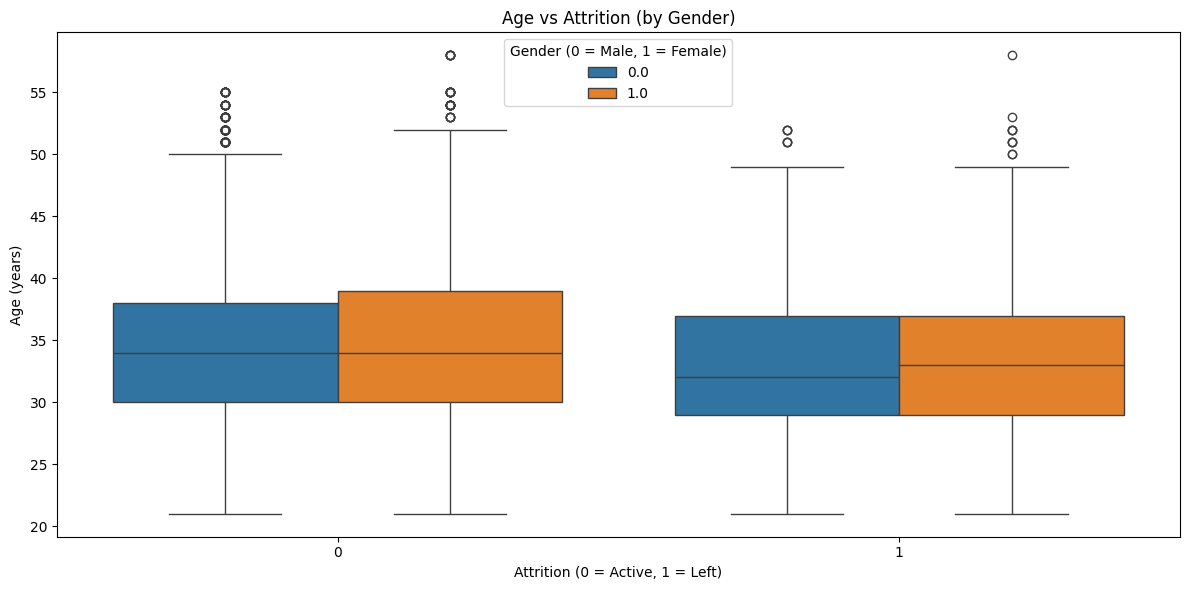

In [121]:
# Age and Attrition (by Gender)
import matplotlib.pyplot as plt
import seaborn as sns

# Clean the data
df_clean_age = df[df['Gender'].isin([0, 1])][['Attrition', 'Gender', 'Age']].dropna()

# Plot: Age vs Attrition (by Gender)
plt.figure(figsize=(12, 6))
sns.boxplot(x='Attrition', y='Age', hue='Gender', data=df_clean_age)
plt.title('Age vs Attrition (by Gender)')
plt.xlabel('Attrition (0 = Active, 1 = Left)')
plt.ylabel('Age (years)')
plt.legend(title='Gender (0 = Male, 1 = Female)')
plt.tight_layout()
plt.show()


#### Interpretation
##### Overall Median Age:

Median age for both genders lies around 32–34 years, for both active and attrited drivers.

##### Attrition Pattern:

Slightly younger drivers tend to show higher attrition. The median age for attrited drivers is marginally lower than that of active ones.

The distribution is slightly tighter for attrited drivers, especially among males, suggesting a higher churn among a concentrated younger age group.

##### Gender Comparison:

Both male and female attrited drivers show a similar interquartile range (IQR).

Female drivers show slightly higher median age than male counterparts in both active and attrited categories, but the difference is marginal.

#### Business Insights
##### Targeted Retention for Younger Drivers:

Attrition appears marginally higher among drivers in their late 20s to early 30s.

This age group may be more mobile, open to switching platforms, or expecting rapid career growth. Ola can design flexible incentive schemes or loyalty bonuses targeting this group.

##### Age-Neutral Attrition:

The difference in median age between retained and attrited groups is not drastic. Hence, age is not a dominant predictor of attrition but can still be useful when combined with other variables (like Grade, Income, Ratings).

##### Gender-Inclusive Retention Programs:

Gender-wise patterns are consistent, so retention efforts need not be strongly gender-differentiated by age. Ola may, however, explore non-age-related gender insights.



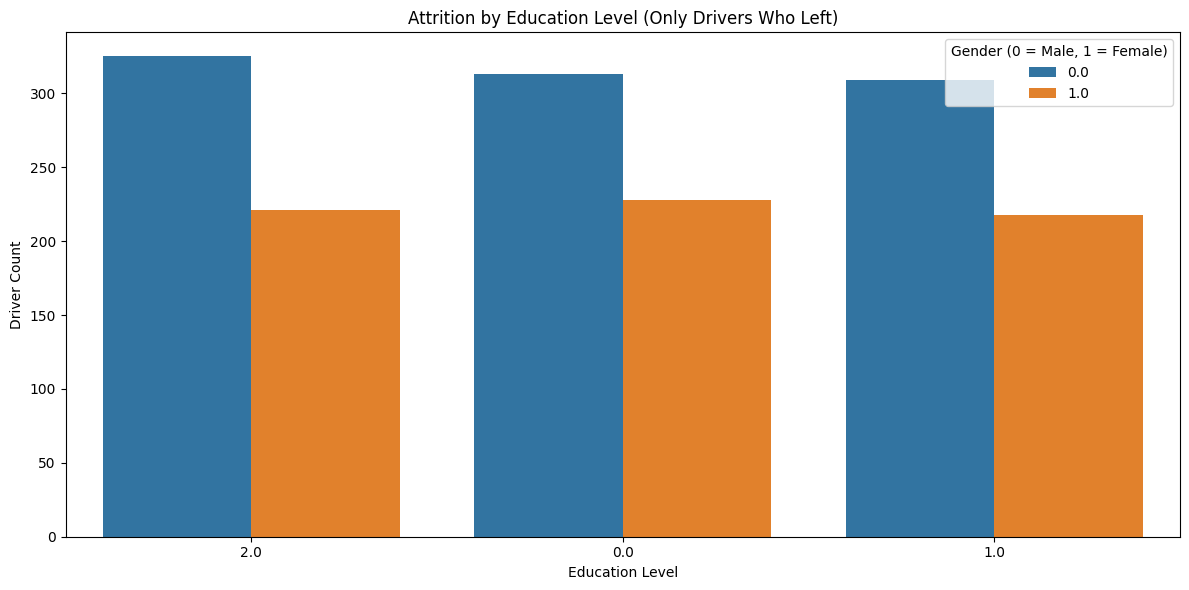

In [124]:
# Education Level vs Attrition (by Gender)
import matplotlib.pyplot as plt
import seaborn as sns

# Clean data
df_clean_edu = df[df['Gender'].isin([0, 1])][['Attrition', 'Gender', 'Education_Level']].dropna()

# Convert Education_Level to string if it's categorical numerically
df_clean_edu['Education_Level'] = df_clean_edu['Education_Level'].astype(str)

# Plot
plt.figure(figsize=(12, 6))
sns.countplot(x='Education_Level', hue='Gender', data=df_clean_edu[df_clean_edu['Attrition'] == 1])
plt.title('Attrition by Education Level (Only Drivers Who Left)')
plt.xlabel('Education Level')
plt.ylabel('Driver Count')
plt.legend(title='Gender (0 = Male, 1 = Female)')
plt.tight_layout()
plt.show()


#### Interpretation: Education Level vs Attrition (by Gender)
From the bar chart showing only attrited drivers, segmented by Education Level and Gender:

##### Observations:
Attrition is fairly consistent across education levels:

The counts for attrition are relatively close for education levels 0.0, 1.0, and 2.0, indicating no strong influence of education level on attrition.

##### Male attrition is consistently higher than female attrition:

Across all education levels, more male drivers left compared to females.

This aligns with previous plots showing higher absolute attrition for male drivers.

##### Education level codes (assuming based on context):

Likely categorical with values like:

0: Illiterate

1: School level

2: College/Graduate+

Despite increasing education, no major decrease in attrition is observed.



#### Business Insights:
##### Driver education level is not a strong determinant of attrition, suggesting:

Attrition decisions may be more influenced by operational or economic factors (e.g., income, working conditions, performance pressure).

Male drivers are at higher risk of leaving across education bands, reinforcing earlier gender-based attrition trends.

Retention programs may not need to be segmented by education level but should be gender-sensitive and focus on operational motivators.

In [127]:
df.isnull().sum()


Unnamed: 0                  0
MMM-YY                      0
Driver_ID                   0
Age                         0
Gender                      0
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
Attrition                   0
Attrition_last              0
Gender_last                 0
dtype: int64

#### Interpretation:
LastWorkingDate is null for drivers who are still working with Ola.

We don’t impute this; instead, we'll use it to compute tenure, which can be a valuable feature.

In [129]:
#  Categorical Encoding
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Make a copy to work on
df_encoded = df.copy()

# One-Hot Encoding for 'City' and 'Joining Designation'
categorical_cols = ['City', 'Joining Designation']
encoder = OneHotEncoder(drop='first', sparse_output=False)  # updated for compatibility

# Fit and transform
encoded_array = encoder.fit_transform(df_encoded[categorical_cols])
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(categorical_cols))

# Combine with original dataframe (drop old categorical columns)
df_encoded = pd.concat([df_encoded.drop(columns=categorical_cols), encoded_df], axis=1)

# Preview
print("Final columns after encoding:")
print(df_encoded.columns.tolist())


Final columns after encoding:
['Unnamed: 0', 'MMM-YY', 'Driver_ID', 'Age', 'Gender', 'Education_Level', 'Income', 'Dateofjoining', 'LastWorkingDate', 'Grade', 'Total Business Value', 'Quarterly Rating', 'Attrition', 'Attrition_last', 'Gender_last', 'City_C10', 'City_C11', 'City_C12', 'City_C13', 'City_C14', 'City_C15', 'City_C16', 'City_C17', 'City_C18', 'City_C19', 'City_C2', 'City_C20', 'City_C21', 'City_C22', 'City_C23', 'City_C24', 'City_C25', 'City_C26', 'City_C27', 'City_C28', 'City_C29', 'City_C3', 'City_C4', 'City_C5', 'City_C6', 'City_C7', 'City_C8', 'City_C9', 'Joining Designation_2.0', 'Joining Designation_3.0', 'Joining Designation_4.0', 'Joining Designation_5.0']


In [130]:
# 10.1 Tenure_Months
import pandas as pd
import numpy as np

# Copy the working dataframe
df_tenure = df_encoded.copy()

# Convert dates to datetime
df_tenure['Dateofjoining'] = pd.to_datetime(df_tenure['Dateofjoining'])
df_tenure['LastWorkingDate'] = pd.to_datetime(df_tenure['LastWorkingDate'])

# Replace missing 'LastWorkingDate' with max date in column
max_date = df_tenure['LastWorkingDate'].max()
df_tenure['LastWorkingDate'] = df_tenure['LastWorkingDate'].fillna(max_date)

# Compute tenure in months (approximate by days / 30.44)
df_tenure['Tenure_Months'] = ((df_tenure['LastWorkingDate'] - df_tenure['Dateofjoining']).dt.days / 30.44).round(1)

# Summary
print(df_tenure['Tenure_Months'].describe())



count    19104.000000
mean        30.967023
std         23.294874
min          0.000000
25%         12.700000
50%         26.700000
75%         48.400000
max         92.900000
Name: Tenure_Months, dtype: float64


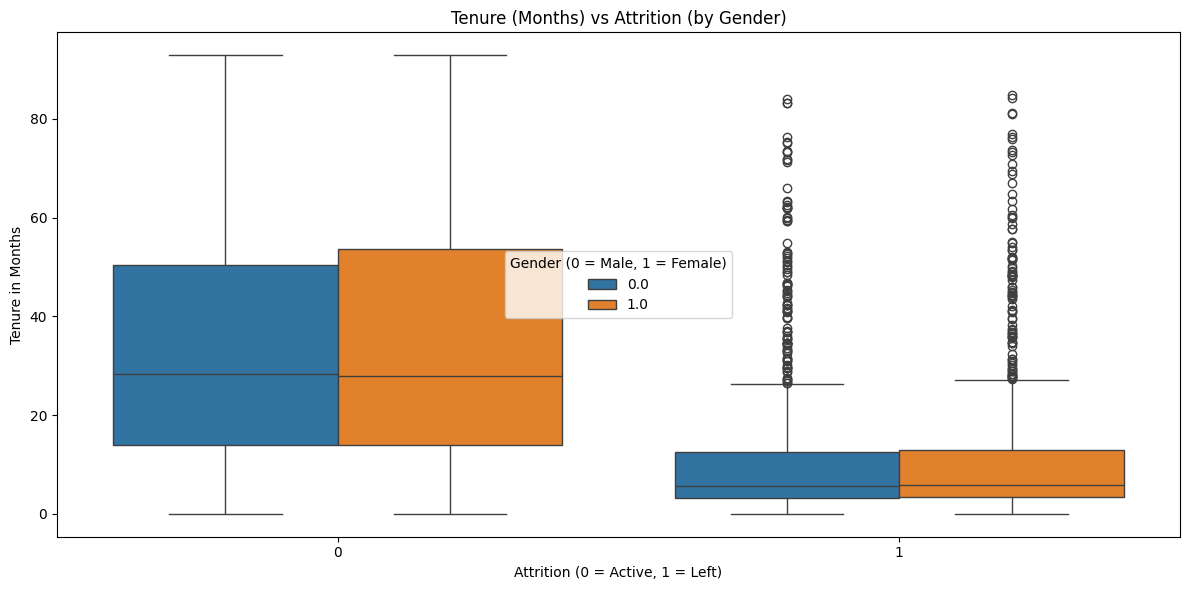

In [131]:
# Tenure_Months vs Attrition (segmented by Gender)
import matplotlib.pyplot as plt
import seaborn as sns

# Filter clean data
df_clean_tenure = df_tenure[df_tenure['Gender'].isin([0, 1])][['Attrition', 'Gender', 'Tenure_Months']].dropna()

# Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Attrition', y='Tenure_Months', hue='Gender', data=df_clean_tenure)
plt.title('Tenure (Months) vs Attrition (by Gender)')
plt.xlabel('Attrition (0 = Active, 1 = Left)')
plt.ylabel('Tenure in Months')
plt.legend(title='Gender (0 = Male, 1 = Female)')
plt.tight_layout()
plt.show()


#### Interpretation:
##### Active Drivers (Attrition = 0):

##### Male drivers (blue):

Tenure ranges widely (0 to ~90 months).

Median tenure ≈ 28–30 months.

##### Female drivers (orange):

Similar spread as males.

Median tenure is roughly the same or slightly higher.

##### Drivers Who Left (Attrition = 1):

##### Male drivers:

Most left within the first 6–10 months.

Very few remained beyond 24 months.

##### Female drivers:

Similar trend — majority left early (median ≈ 6–8 months).

A few outliers with longer tenures.



#### Business Insights:
Early attrition is a major concern. Most drivers who left did so within the first year.

Both genders show similar tenure patterns for churn — indicating tenure is a strong driver-independent churn indicator.

Retention efforts should focus on the first 12 months to reduce churn rates.

In [134]:
# Step 10.2: Create Tenure Category Bins
# Define bin edges and labels
tenure_bins = [0, 6, 12, 24, 36, 60, np.inf]
tenure_labels = ['0-6m', '6-12m', '1-2y', '2-3y', '3-5y', '>5y']

# Create the Tenure_Bin column
df_tenure['Tenure_Bin'] = pd.cut(df_tenure['Tenure_Months'], bins=tenure_bins, labels=tenure_labels, right=False)

# View distribution
print(df_tenure['Tenure_Bin'].value_counts())


Tenure_Bin
2-3y     4471
1-2y     4262
>5y      3191
3-5y     2711
6-12m    2288
0-6m     2181
Name: count, dtype: int64


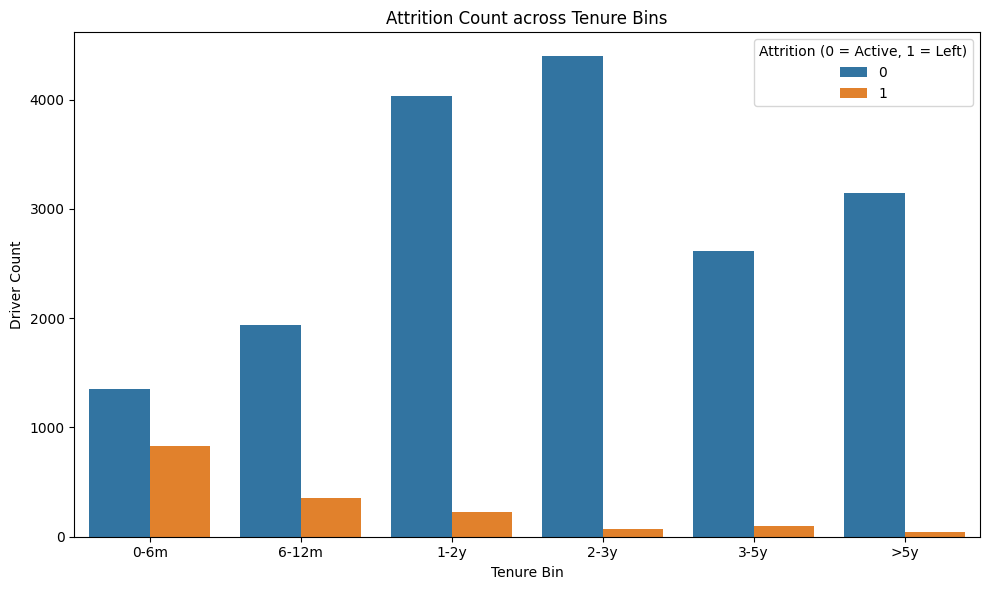

In [135]:
# Attrition vs Tenure Bin
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(x='Tenure_Bin', hue='Attrition', data=df_tenure)
plt.title('Attrition Count across Tenure Bins')
plt.xlabel('Tenure Bin')
plt.ylabel('Driver Count')
plt.legend(title='Attrition (0 = Active, 1 = Left)')
plt.tight_layout()
plt.show()


#### Insights from the Chart:
Majority of attrition happens in the 0–6 months and 6–12 months tenure bins.

Attrition significantly drops as tenure increases beyond 1 year.

Drivers who stay longer than 2–3 years are less likely to leave, highlighting a strong retention effect after a certain threshold.

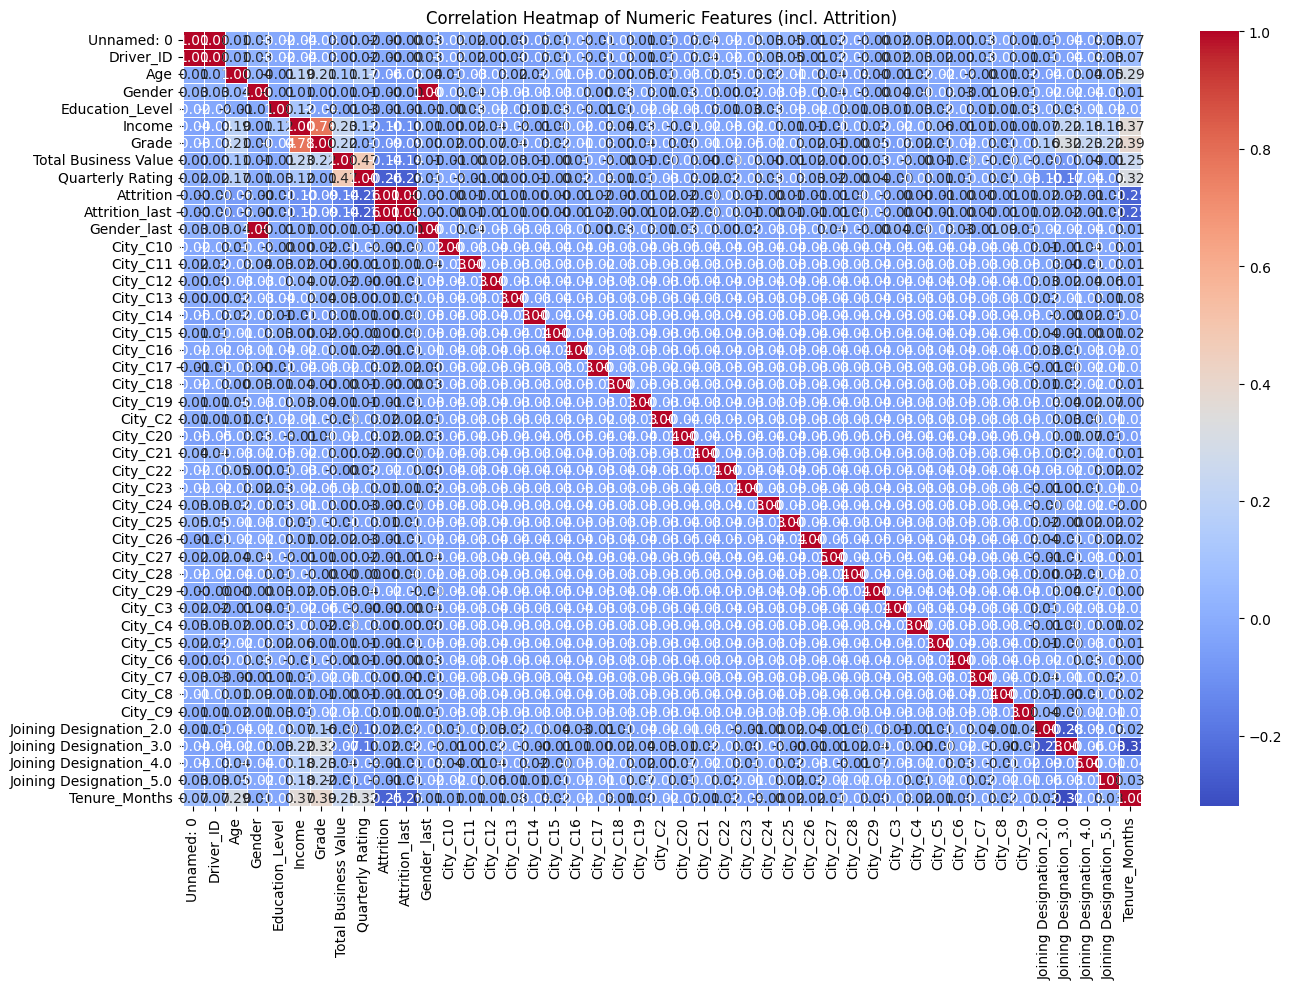

In [137]:
# correlation heatmap
import matplotlib.pyplot as plt
import seaborn as sns

# Add 'Tenure_Months' if it's not already in df_tenure
# Make sure to work with the most recent version of the dataset
df_corr = df_tenure.copy()

# Select only numeric columns
numeric_cols = df_corr.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Compute correlation matrix
corr_matrix = df_corr[numeric_cols].corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features (incl. Attrition)')
plt.tight_layout()
plt.show()


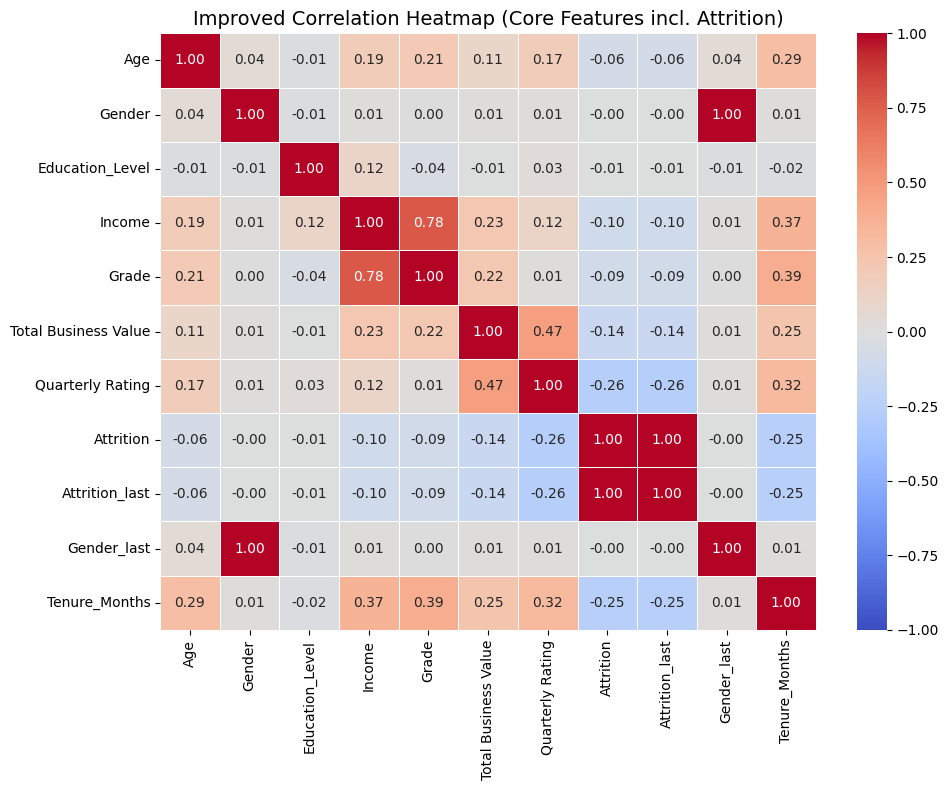

In [138]:
# decluttered heatmap
import matplotlib.pyplot as plt
import seaborn as sns

# Subset only core numeric features (omit one-hot columns for clarity)
core_numeric_cols = [
    'Age', 'Gender', 'Education_Level', 'Income', 'Grade', 'Total Business Value',
    'Quarterly Rating', 'Attrition', 'Attrition_last', 'Gender_last', 'Tenure_Months'
]

# Compute correlation
corr_matrix = df_tenure[core_numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title("Improved Correlation Heatmap (Core Features incl. Attrition)", fontsize=14)
plt.tight_layout()
plt.show()


#### Insights:
Lower tenure and lower quarterly ratings are most strongly associated with attrition.

Business performance features (Grade, TBV, Income) have mild negative correlation.

Demographics (Age, Gender, Education) show very weak or negligible correlation.

In [140]:
# train-val-test split
from sklearn.model_selection import train_test_split

# Clean working copy
df_model = df_tenure.copy()
drop_cols = ['Unnamed: 0', 'MMM-YY', 'Driver_ID', 'Dateofjoining', 'LastWorkingDate']
df_model = df_model.drop(columns=drop_cols)

# Features and target
# X = df_model.drop(columns='Attrition')
# y = df_model['Attrition']

# # Step 1: Train vs Temp (70% / 30%)
# X_train, X_temp, y_train, y_temp = train_test_split(X, y, 
#                                                     test_size=0.30, 
#                                                     stratify=y, 
#                                                     random_state=42)

# # Step 2: Validation vs Test (from 30% => 15% each)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, 
#                                                 test_size=0.50,  # 50% of 30% = 15% of total
#                                                 stratify=y_temp, 
#                                                 random_state=42)



# Drop 'Attrition_last' from features to avoid target leakage
X = df_model.drop(columns=['Attrition', 'Attrition_last'])  # now safe
y = df_model['Attrition']

# Step 1: Train vs Temp (70% / 30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    stratify=y, 
                                                    random_state=42)

# Step 2: Validation vs Test (from 30% => 15% each)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, 
                                                test_size=0.50,  # 50% of 30% = 15%
                                                stratify=y_temp, 
                                                random_state=42)

# Final sizes
print(f"Train shape: {X_train.shape}")
print(f"Validation shape: {X_val.shape}")
print(f"Test shape: {X_test.shape}")



Train shape: (13372, 42)
Validation shape: (2866, 42)
Test shape: (2866, 42)


###  Step 13 – Handling Class Imbalance.

In [142]:
# Check for non-numeric columns
non_numeric_cols = X_train.select_dtypes(include=['object']).columns
print("Non-numeric columns in X_train:\n", non_numeric_cols.tolist())


Non-numeric columns in X_train:
 []


In [143]:
for col in X_train.columns:
    unique_vals = X_train[col].unique()
    if any(isinstance(val, str) for val in unique_vals):
        print(f"{col} contains strings like: {unique_vals[:5]}")


Tenure_Bin contains strings like: ['3-5y', '2-3y', '>5y', '1-2y', '0-6m']
Categories (6, object): ['0-6m' < '6-12m' < '1-2y' < '2-3y' < '3-5y' < '>5y']


In [144]:
X_train = X_train.drop(columns=['Tenure_Bin'], errors='ignore')
X_val = X_val.drop(columns=['Tenure_Bin'], errors='ignore')
X_test = X_test.drop(columns=['Tenure_Bin'], errors='ignore')


In [145]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_smote))


Before SMOTE: Counter({0: 12241, 1: 1131})
After SMOTE: Counter({0: 12241, 1: 12241})


C:\Users\VEERANNA\anaconda3\envs\py311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\VEERANNA\anaconda3\envs\py311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\VEERANNA\anaconda3\envs\py311\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\VEERANNA\anaconda3\envs\py311\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\VEERANNA\anaconda3\envs\py311\Lib\subprocess.py",

In [146]:
print(X_train_smote.columns.tolist())

['Age', 'Gender', 'Education_Level', 'Income', 'Grade', 'Total Business Value', 'Quarterly Rating', 'Gender_last', 'City_C10', 'City_C11', 'City_C12', 'City_C13', 'City_C14', 'City_C15', 'City_C16', 'City_C17', 'City_C18', 'City_C19', 'City_C2', 'City_C20', 'City_C21', 'City_C22', 'City_C23', 'City_C24', 'City_C25', 'City_C26', 'City_C27', 'City_C28', 'City_C29', 'City_C3', 'City_C4', 'City_C5', 'City_C6', 'City_C7', 'City_C8', 'City_C9', 'Joining Designation_2.0', 'Joining Designation_3.0', 'Joining Designation_4.0', 'Joining Designation_5.0', 'Tenure_Months']


In [147]:
print(X_train.columns.tolist())

['Age', 'Gender', 'Education_Level', 'Income', 'Grade', 'Total Business Value', 'Quarterly Rating', 'Gender_last', 'City_C10', 'City_C11', 'City_C12', 'City_C13', 'City_C14', 'City_C15', 'City_C16', 'City_C17', 'City_C18', 'City_C19', 'City_C2', 'City_C20', 'City_C21', 'City_C22', 'City_C23', 'City_C24', 'City_C25', 'City_C26', 'City_C27', 'City_C28', 'City_C29', 'City_C3', 'City_C4', 'City_C5', 'City_C6', 'City_C7', 'City_C8', 'City_C9', 'Joining Designation_2.0', 'Joining Designation_3.0', 'Joining Designation_4.0', 'Joining Designation_5.0', 'Tenure_Months']


In [148]:
(df_model['Attrition'] == df_model['Attrition_last']).value_counts()


True    19104
Name: count, dtype: int64

### Step 14.1 – Train a Decision Tree Classifier

=== Decision Tree Evaluation on Validation Data ===
Confusion Matrix:
[[2537   86]
 [ 117  126]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      2623
           1       0.59      0.52      0.55       243

    accuracy                           0.93      2866
   macro avg       0.78      0.74      0.76      2866
weighted avg       0.93      0.93      0.93      2866

Accuracy Score: 0.9291695743196092


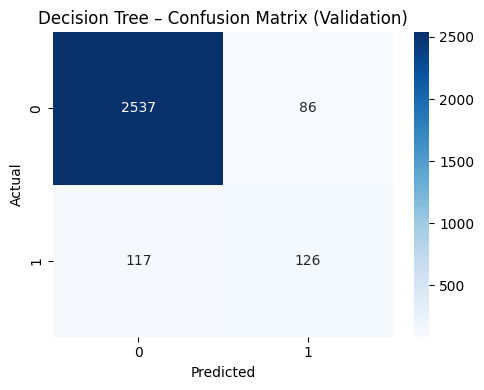

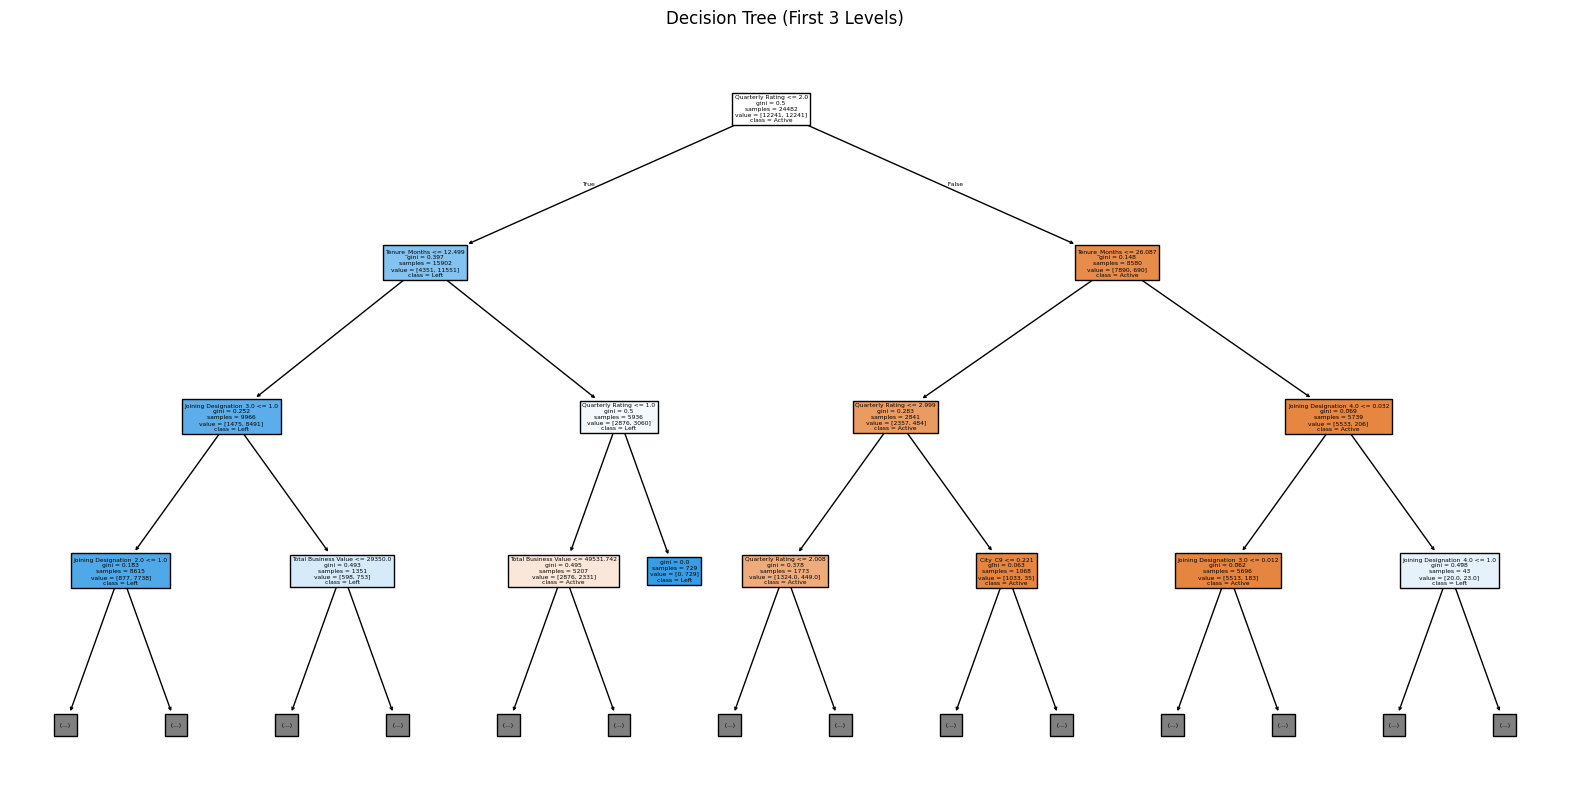

In [150]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize and train the model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_smote, y_train_smote)

# Predict on validation data
y_val_pred = dt_model.predict(X_val)

# Evaluation metrics
print("=== Decision Tree Evaluation on Validation Data ===")
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))
print("\nClassification Report:")
print(classification_report(y_val, y_val_pred))
print("Accuracy Score:", accuracy_score(y_val, y_val_pred))

# Optional: Confusion matrix heatmap
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_val, y_val_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Decision Tree – Confusion Matrix (Validation)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Optional: Plot the tree structure (if features < ~20 for readability)
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X_train_smote.columns, class_names=["Active", "Left"], filled=True, max_depth=3)
plt.title("Decision Tree (First 3 Levels)")
plt.show()


#### Interpretation & Insights:
The model performs very well on the majority class (Active drivers) with 96–97% scores.

Minority class (Attrited drivers) shows only 52% recall, meaning almost half of attrition cases are missed.

The imbalance challenge still affects recall for Class 1, even after applying SMOTE.

Precision for predicting attrition is 59% — decent, but leaves room for improvement.

#### Confusiom matrix
True Negatives (TN): 2537 drivers correctly predicted as "Active"

False Positives (FP): 86 drivers wrongly predicted as "Attrited"

False Negatives (FN): 117 attrited drivers wrongly predicted as "Active"

True Positives (TP): 126 attrited drivers correctly identified

=== Decision Tree Evaluation on Test Set ===
 Execution Time: 0.00 seconds
Confusion Matrix:
 [[2535   89]
 [ 122  120]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2624
           1       0.57      0.50      0.53       242

    accuracy                           0.93      2866
   macro avg       0.76      0.73      0.75      2866
weighted avg       0.92      0.93      0.92      2866

Accuracy Score: 0.9263782274947662


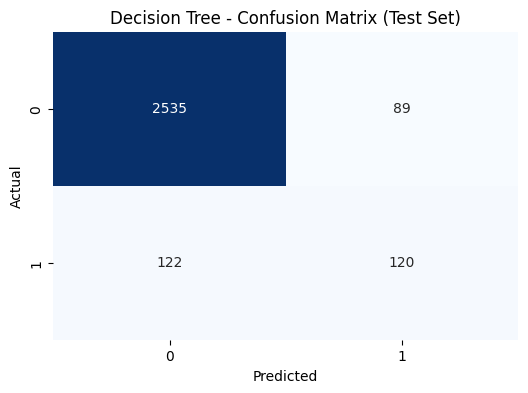

In [153]:
# Evaluate dt_model (Decision Tree) on Test Set
# Start timing
import time
start_time = time.time()

# Predict on test data
y_test_pred_dt = dt_model.predict(X_test)

# Evaluation Metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

print("=== Decision Tree Evaluation on Test Set ===")
print(" Execution Time: {:.2f} seconds".format(time.time() - start_time))

# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_test_pred_dt)
print("Confusion Matrix:\n", cm_dt)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred_dt))

# Accuracy Score
acc_dt = accuracy_score(y_test, y_test_pred_dt)
print("Accuracy Score:", acc_dt)

# Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Decision Tree - Confusion Matrix (Test Set)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


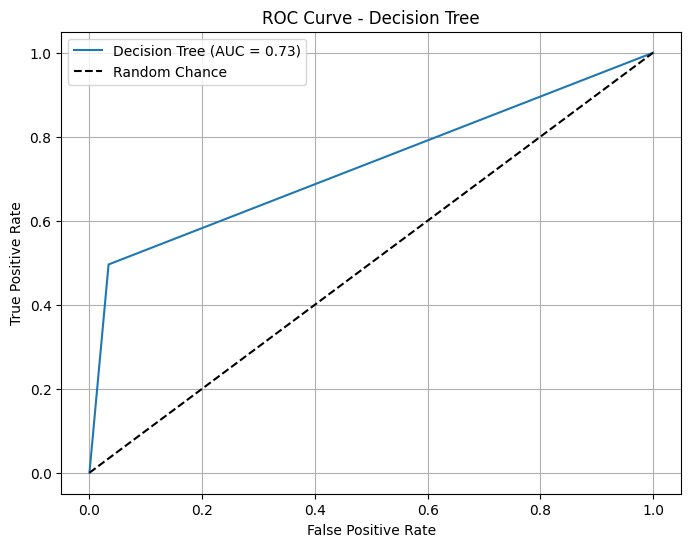

In [154]:
# ROC AUC on Decision Tree Classifier Model

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize y_test
y_test_binary = label_binarize(y_test, classes=[0, 1]).ravel()

# --- Decision Tree ---
y_proba_dt = dt_model.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test_binary, y_proba_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend()
plt.grid()
plt.show()


### 14.2 Random Forest Classifier – Model Training & Evaluation

=== Random Forest Evaluation on Validation Data ===
Confusion Matrix:
[[2579   44]
 [ 141  102]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      2623
           1       0.70      0.42      0.52       243

    accuracy                           0.94      2866
   macro avg       0.82      0.70      0.74      2866
weighted avg       0.93      0.94      0.93      2866

Accuracy Score: 0.9354501046755059


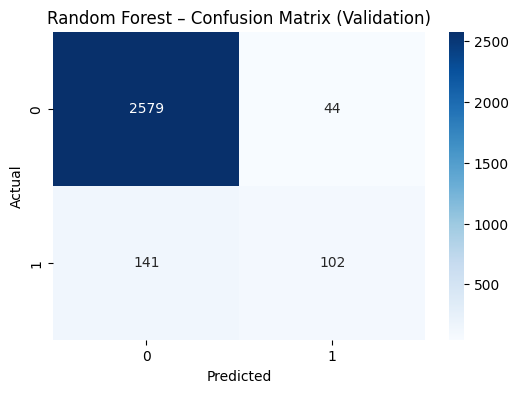

In [156]:
# Step 14.2 – Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Instantiate and train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_smote, y_train_smote)

# 2. Predict on validation data
y_val_pred = rf_model.predict(X_val)

# 3. Evaluate
print("=== Random Forest Evaluation on Validation Data ===")
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))
print("\nClassification Report:")
print(classification_report(y_val, y_val_pred))
print("Accuracy Score:", accuracy_score(y_val, y_val_pred))

# 4. Confusion matrix heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_val, y_val_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest – Confusion Matrix (Validation)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Random Forest improves precision for attrition cases (fewer false positives), but recall is slightly lower — meaning some attrition cases are still being missed.



True Negatives (TN) = 2579 → correctly predicted Active drivers

False Positives (FP) = 44 → predicted attrition but driver stayed

False Negatives (FN) = 141 → missed predicting attrition

True Positives (TP) = 102 → correctly predicted attrition

The model still misses more attrition cases (high FN), though it confidently predicts those it does catch (higher precision).

In [159]:
# GridSearchCV on Random Forest
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# 2. Instantiate the model
rf = RandomForestClassifier(random_state=42)

# 3. Setup GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf,
                               param_grid=param_grid,
                               scoring='f1',  # Change to 'recall' or 'accuracy' if preferred
                               cv=5,
                               n_jobs=-1,
                               verbose=2)

# 4. Time the fit process
start_time = time.time()
grid_search_rf.fit(X_train_smote, y_train_smote)
end_time = time.time()

# 5. Print time taken
print(f"\n GridSearchCV completed in {(end_time - start_time)/60:.2f} minutes")

# 6. Best estimator and parameters
best_rf = grid_search_rf.best_estimator_
print("Best Parameters:", grid_search_rf.best_params_)

# 7. Evaluate on validation data
y_val_pred_rf = best_rf.predict(X_val)
print("\n=== Tuned Random Forest Evaluation on Validation Data ===")
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred_rf))
print("\nClassification Report:")
print(classification_report(y_val, y_val_pred_rf))
print("Accuracy Score:", accuracy_score(y_val, y_val_pred_rf))


Fitting 5 folds for each of 48 candidates, totalling 240 fits

 GridSearchCV completed in 7.75 minutes
Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

=== Tuned Random Forest Evaluation on Validation Data ===
Confusion Matrix:
[[2560   63]
 [ 134  109]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      2623
           1       0.63      0.45      0.53       243

    accuracy                           0.93      2866
   macro avg       0.79      0.71      0.74      2866
weighted avg       0.92      0.93      0.93      2866

Accuracy Score: 0.9312630844382415


In [160]:
# fit the best Random Forest model on SMOTE-balanced training data
from sklearn.ensemble import RandomForestClassifier

# Replace these parameters with your best params from tuning
rf_best = RandomForestClassifier(
    n_estimators=200,
    max_depth=20,
    max_features='sqrt',
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

# Fit on SMOTE data
rf_best.fit(X_train_smote, y_train_smote)


RandomForestClassifier(max_depth=20, n_estimators=200, random_state=42)

=== Tuned Random Forest Evaluation on Test Set ===
Execution Time: 0.11 seconds
Confusion Matrix:
 [[2565   59]
 [ 135  107]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      2624
           1       0.64      0.44      0.52       242

    accuracy                           0.93      2866
   macro avg       0.80      0.71      0.74      2866
weighted avg       0.92      0.93      0.93      2866

Accuracy Score: 0.9323098394975575


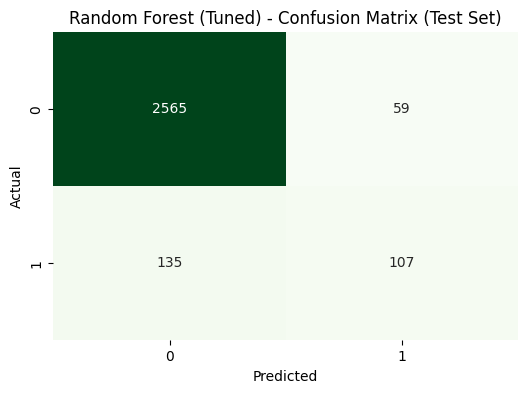

In [161]:
# Evaluate rf_best (Tuned Random Forest) on Test Set
# Start timing
start_time = time.time()

# Predict on test data
y_test_pred_rf = rf_best.predict(X_test)

# Evaluation Metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

print("=== Tuned Random Forest Evaluation on Test Set ===")
print("Execution Time: {:.2f} seconds".format(time.time() - start_time))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_test_pred_rf)
print("Confusion Matrix:\n", cm_rf)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred_rf))

# Accuracy Score
acc_rf = accuracy_score(y_test, y_test_pred_rf)
print("Accuracy Score:", acc_rf)

# Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title("Random Forest (Tuned) - Confusion Matrix (Test Set)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


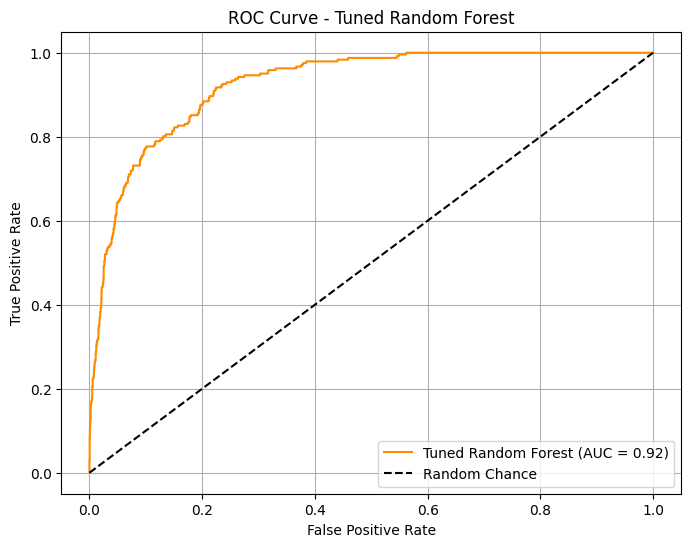

In [162]:
# --- ROC AUC rf_best ---
y_proba_rf = rf_best.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test_binary, y_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Tuned Random Forest (AUC = {roc_auc_rf:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Tuned Random Forest')
plt.legend()
plt.grid()
plt.show()


### 14.3 XGBClassifier

In [164]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 1: Instantiate XGBClassifier with basic parameters
xgb_clf = XGBClassifier(
    n_estimators=100,         # Number of boosting rounds
    max_depth=5,              # Max depth of each tree
    learning_rate=0.1,        # Step size shrinkage
    subsample=0.8,            # Subsample ratio of training instances
    colsample_bytree=0.8,     # Subsample ratio of columns for each tree
    use_label_encoder=False,  # Avoid warning in newer versions
    eval_metric='logloss',    # Evaluation metric
    random_state=42
)

# Step 2: Train on SMOTE-augmented data
xgb_clf.fit(X_train_smote, y_train_smote)

# Step 3: Predict on validation data
y_val_pred = xgb_clf.predict(X_val)

# Step 4: Evaluate
print("=== XGBoost Evaluation on Validation Data ===")
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))

print("\nClassification Report:")
print(classification_report(y_val, y_val_pred))

print("Accuracy Score:", accuracy_score(y_val, y_val_pred))


C:\Users\VEERANNA\anaconda3\envs\py311\Lib\site-packages\xgboost\training.py:183: UserWarning: [02:48:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


=== XGBoost Evaluation on Validation Data ===
Confusion Matrix:
[[2531   92]
 [ 122  121]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      2623
           1       0.57      0.50      0.53       243

    accuracy                           0.93      2866
   macro avg       0.76      0.73      0.75      2866
weighted avg       0.92      0.93      0.92      2866

Accuracy Score: 0.9253314724354501


In [165]:
# HP tuning on XGBClassifier
import time
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Start timing
start_time = time.time()

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# GridSearchCV
grid_xgb = GridSearchCV(xgb, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_xgb.fit(X_train_smote, y_train_smote)

# End timing
end_time = time.time()
elapsed = (end_time - start_time) / 60
print(f"\n GridSearchCV completed in {elapsed:.2f} minutes")
print("Best Parameters:", grid_xgb.best_params_)

# Evaluate on Validation Set
y_pred_val = grid_xgb.predict(X_val)
print("end_time = " , end_time)
print("\n=== Tuned XGBoost Evaluation on Validation Data ===")
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_val))
print("\nClassification Report:\n", classification_report(y_val, y_pred_val))
print("Accuracy Score:", accuracy_score(y_val, y_pred_val))


Fitting 5 folds for each of 32 candidates, totalling 160 fits


C:\Users\VEERANNA\anaconda3\envs\py311\Lib\site-packages\xgboost\training.py:183: UserWarning: [02:52:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



 GridSearchCV completed in 4.36 minutes
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200, 'subsample': 1.0}
end_time =  1752009748.702078

=== Tuned XGBoost Evaluation on Validation Data ===
Confusion Matrix:
 [[2589   34]
 [ 132  111]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      2623
           1       0.77      0.46      0.57       243

    accuracy                           0.94      2866
   macro avg       0.86      0.72      0.77      2866
weighted avg       0.94      0.94      0.94      2866

Accuracy Score: 0.942079553384508


In [166]:
# Fit best XGBClassifier
from xgboost import XGBClassifier

# best parameters from GridSearchCV
xgb_best = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=10,
    subsample=1.0,
    colsample_bytree=1.0,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Fit on SMOTE-balanced training data
xgb_best.fit(X_train_smote, y_train_smote)


C:\Users\VEERANNA\anaconda3\envs\py311\Lib\site-packages\xgboost\training.py:183: UserWarning: [02:52:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

=== Tuned XGBoost Evaluation on Test Set ===
Execution Time: 0.03 seconds
Confusion Matrix:
 [[2589   35]
 [ 129  113]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2624
           1       0.76      0.47      0.58       242

    accuracy                           0.94      2866
   macro avg       0.86      0.73      0.77      2866
weighted avg       0.94      0.94      0.94      2866

Accuracy Score: 0.9427773900907188


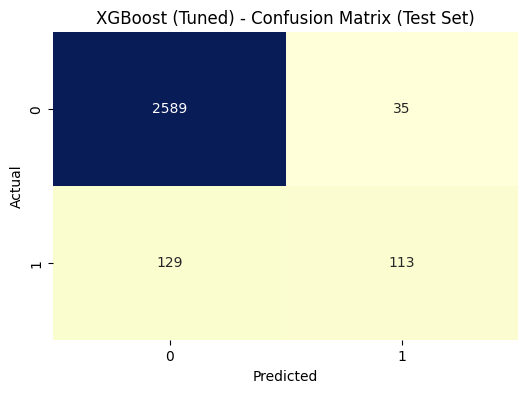

In [167]:
# Evaluate on Test Set
import time
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Start timing
start_time = time.time()

# Predict
y_test_pred_xgb = xgb_best.predict(X_test)

# Evaluation
print("=== Tuned XGBoost Evaluation on Test Set ===")
print("Execution Time: {:.2f} seconds".format(time.time() - start_time))

# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_test_pred_xgb)
print("Confusion Matrix:\n", cm_xgb)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred_xgb))

# Accuracy Score
acc_xgb = accuracy_score(y_test, y_test_pred_xgb)
print("Accuracy Score:", acc_xgb)

# Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='YlGnBu', cbar=False)
plt.title("XGBoost (Tuned) - Confusion Matrix (Test Set)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


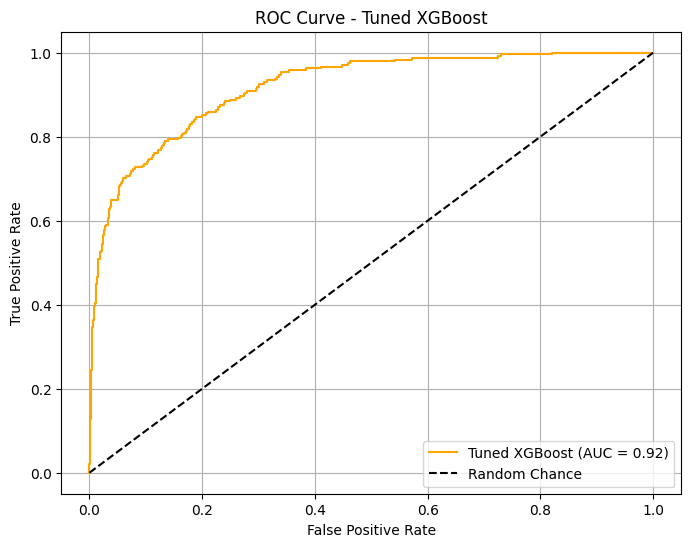

In [168]:
# --- ROC AUC Tuned XGBoost ---
y_proba_xgb = xgb_best.predict_proba(X_test)[:, 1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test_binary, y_proba_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, label=f'Tuned XGBoost (AUC = {roc_auc_xgb:.2f})', color='orange')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Tuned XGBoost')
plt.legend()
plt.grid()
plt.show()


### 14.4 Gradient boosting classifier

In [170]:
# gradient boosting classifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 2: Instantiate the model with default parameters
gb_clf = GradientBoostingClassifier(random_state=42)

# Step 3: Fit the model on SMOTE-augmented training data
gb_clf.fit(X_train_smote, y_train_smote)

# Step 4: Predict on validation data
y_val_pred = gb_clf.predict(X_val)

# Step 5: Evaluate
print("=== Gradient Boosting Evaluation on Validation Data ===")
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))
print("\nClassification Report:")
print(classification_report(y_val, y_val_pred))
print("Accuracy Score:", accuracy_score(y_val, y_val_pred))


=== Gradient Boosting Evaluation on Validation Data ===
Confusion Matrix:
[[2508  115]
 [ 108  135]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2623
           1       0.54      0.56      0.55       243

    accuracy                           0.92      2866
   macro avg       0.75      0.76      0.75      2866
weighted avg       0.92      0.92      0.92      2866

Accuracy Score: 0.9221912072575017


In [171]:
# HP tuning for gradient boosting classifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import time

# Start time
start_time = time.time()

# 1. Define parameter grid
param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5, 10],
    'subsample': [0.8, 1.0]
}

# 2. Instantiate model
gb_clf = GradientBoostingClassifier(random_state=42)

# 3. GridSearchCV setup
grid_search_gb = GridSearchCV(
    estimator=gb_clf,
    param_grid=param_grid_gb,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# 4. Fit the model
grid_search_gb.fit(X_train_smote, y_train_smote)

# End time
end_time = time.time()
print(f"\n GridSearchCV completed in {(end_time - start_time)/60:.2f} minutes")
print("Best Parameters:", grid_search_gb.best_params_)

# Best Model
gb_best = grid_search_gb.best_estimator_


Fitting 5 folds for each of 24 candidates, totalling 120 fits

 GridSearchCV completed in 19.87 minutes
Best Parameters: {'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 100, 'subsample': 0.8}


=== Tuned Gradient Boosting Evaluation on Test Set ===
Execution Time: 0.03 seconds
Confusion Matrix:
 [[2570   54]
 [ 125  117]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      2624
           1       0.68      0.48      0.57       242

    accuracy                           0.94      2866
   macro avg       0.82      0.73      0.77      2866
weighted avg       0.93      0.94      0.93      2866

Accuracy Score: 0.9375436147941382


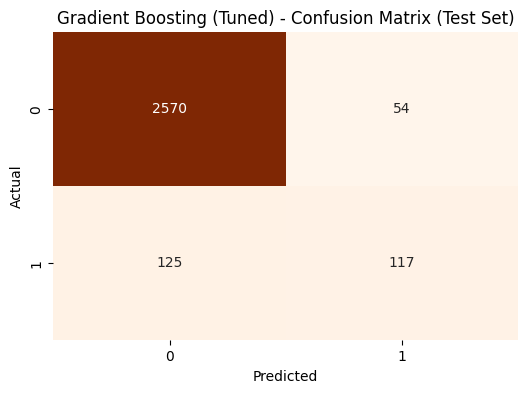

In [172]:
# Evaluate gradient boostin classifier on Test Set
import time
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Start timing
start_time = time.time()

# Predict on test data
y_test_pred_gb = gb_best.predict(X_test)

# Evaluation
print("=== Tuned Gradient Boosting Evaluation on Test Set ===")
print("Execution Time: {:.2f} seconds".format(time.time() - start_time))

# Confusion Matrix
cm_gb = confusion_matrix(y_test, y_test_pred_gb)
print("Confusion Matrix:\n", cm_gb)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred_gb))

# Accuracy
acc_gb = accuracy_score(y_test, y_test_pred_gb)
print("Accuracy Score:", acc_gb)

# Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.title("Gradient Boosting (Tuned) - Confusion Matrix (Test Set)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


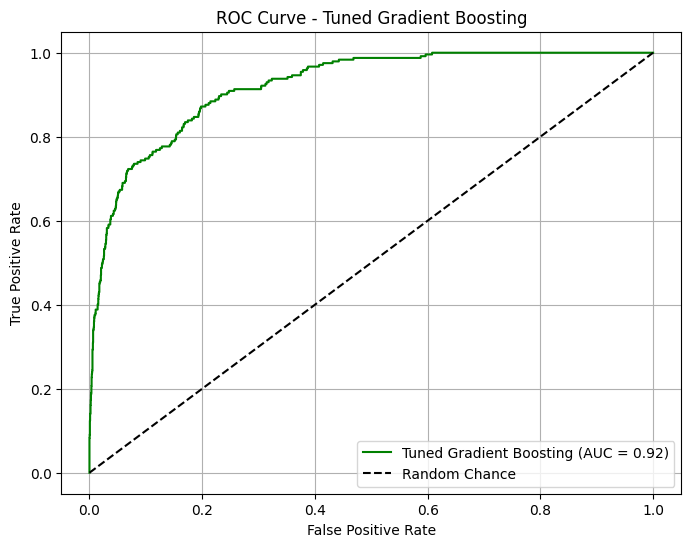

In [173]:
# --- ROC AUC Tuned Gradient Boosting ---
y_proba_gb = gb_best.predict_proba(X_test)[:, 1]
fpr_gb, tpr_gb, _ = roc_curve(y_test_binary, y_proba_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_gb, tpr_gb, label=f'Tuned Gradient Boosting (AUC = {roc_auc_gb:.2f})', color='green')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Tuned Gradient Boosting')
plt.legend()
plt.grid()
plt.show()


### 14.5 LightGBMClassifier

In [175]:
# 1. Import Libraries
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 2. Instantiate the Model
lgb_model = LGBMClassifier(random_state=42)

# 3. Fit on SMOTE-balanced training data
lgb_model.fit(X_train_smote, y_train_smote)

# 4. Predict on Validation Data
y_val_pred = lgb_model.predict(X_val)

# 5. Evaluate
print("=== LightGBM Evaluation on Validation Data ===")
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))
print("\nClassification Report:")
print(classification_report(y_val, y_val_pred))
print("Accuracy Score:", accuracy_score(y_val, y_val_pred))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 12241, number of negative: 12241
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005601 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10061
[LightGBM] [Info] Number of data points in the train set: 24482, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
=== LightGBM Evaluation on Validation Data ===
Confusion Matrix:
[[2562   61]
 [ 136  107]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      2623
           1       0.64      0.44      0.52       243

    accuracy                           0.93      2866
   macro avg       0.79      0.71      0.74      2866
weighted avg       0.92      0.93      0.93      2866

Accuracy Score: 0.9312630844382415


In [176]:
#### GridSearchCV on lightgbm
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import time

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 15],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Instantiate model
lgbm = LGBMClassifier(random_state=42)

# Grid Search with 5-fold CV
grid_search_lgbm = GridSearchCV(estimator=lgbm,
                                 param_grid=param_grid,
                                 cv=5,
                                 scoring='accuracy',
                                 n_jobs=-1,
                                 verbose=1)

# Time the process
start_time = time.time()
grid_search_lgbm.fit(X_train, y_train)
end_time = time.time()

print(f"\n GridSearchCV completed in {(end_time - start_time)/60:.2f} minutes")
print("Best Parameters:", grid_search_lgbm.best_params_)

# Evaluate on validation data
best_lgbm = grid_search_lgbm.best_estimator_
y_val_pred = best_lgbm.predict(X_val)
print("end_time = ",end_time)
print("\n=== Tuned LightGBM Evaluation on Validation Data ===")
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))
print("\nClassification Report:\n", classification_report(y_val, y_val_pred))
print("Accuracy Score:", accuracy_score(y_val, y_val_pred))


Fitting 5 folds for each of 48 candidates, totalling 240 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1131, number of negative: 12241
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001773 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 890
[LightGBM] [Info] Number of data points in the train set: 13372, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.084580 -> initscore=-2.381689
[LightGBM] [Info] Start training from score -2.381689

 GridSearchCV completed in 0.89 minutes
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200, 'subsample': 0.8}
end_time =  1752011012.0078137

=== Tuned LightGBM Evaluation on Validation Data ===
Confusion Matrix:
 [[2580   43]
 [ 137  106]]

Classification Report:
               precision    recall  f1-score   su

In [177]:
# fit best LightGBM on SMOTE-balanced training data
from lightgbm import LGBMClassifier

# Instantiate with best parameters
lgbm_best = LGBMClassifier(
    colsample_bytree=1.0,
    learning_rate=0.1,
    max_depth=10,
    n_estimators=200,
    subsample=0.8,
    random_state=42
)

# Fit the model
lgbm_best.fit(X_train_smote, y_train_smote)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 12241, number of negative: 12241
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003961 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10061
[LightGBM] [Info] Number of data points in the train set: 24482, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier(max_depth=10, n_estimators=200, random_state=42, subsample=0.8)

=== Tuned LightGBM Evaluation on Test Set ===
Execution Time: 0.03 seconds
Confusion Matrix:
 [[2585   39]
 [ 135  107]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2624
           1       0.73      0.44      0.55       242

    accuracy                           0.94      2866
   macro avg       0.84      0.71      0.76      2866
weighted avg       0.93      0.94      0.93      2866

Accuracy Score: 0.939288206559665


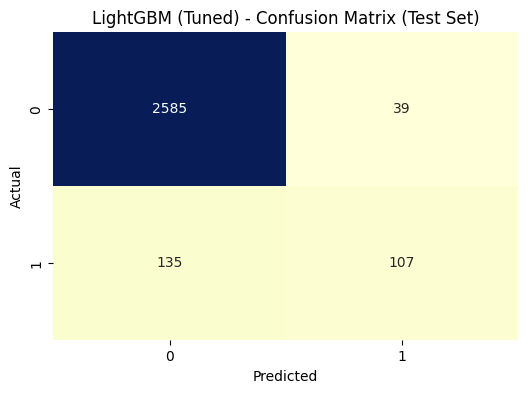

In [178]:
# Evaluate best LightGBM classifier on Test Set
import time
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Start timer
start_time = time.time()

# Predict on test set
y_test_pred_lgbm = lgbm_best.predict(X_test)

# Evaluation Results
print("=== Tuned LightGBM Evaluation on Test Set ===")
print("Execution Time: {:.2f} seconds".format(time.time() - start_time))

# Confusion Matrix
cm_lgbm = confusion_matrix(y_test, y_test_pred_lgbm)
print("Confusion Matrix:\n", cm_lgbm)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred_lgbm))

# Accuracy Score
acc_lgbm = accuracy_score(y_test, y_test_pred_lgbm)
print("Accuracy Score:", acc_lgbm)

# Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm_lgbm, annot=True, fmt='d', cmap='YlGnBu', cbar=False)
plt.title("LightGBM (Tuned) - Confusion Matrix (Test Set)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


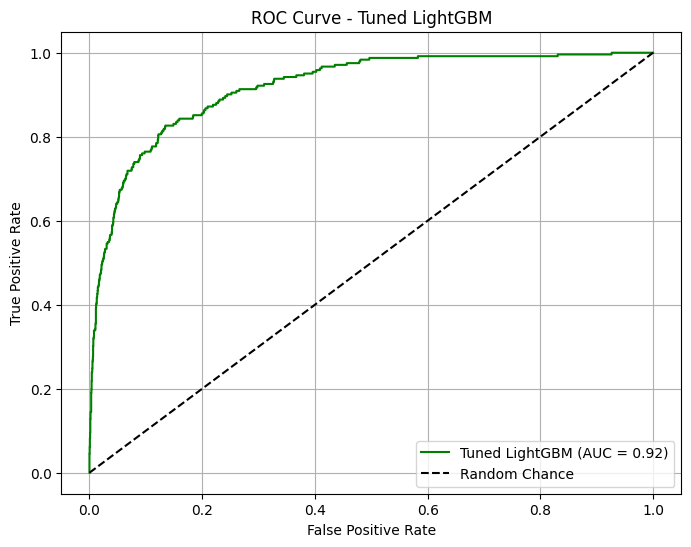

In [179]:
# --- ROC AUC Tuned LightGBM ---
y_proba_lgbm = lgbm_best.predict_proba(X_test)[:, 1]
fpr_lgbm, tpr_lgbm, _ = roc_curve(y_test_binary, y_proba_lgbm)
roc_auc_lgbm = auc(fpr_lgbm, tpr_lgbm)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lgbm, tpr_lgbm, label=f'Tuned LightGBM (AUC = {roc_auc_lgbm:.2f})', color='green')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Tuned LightGBM')
plt.legend()
plt.grid()
plt.show()


### 14.6 Stacked model

In [181]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [182]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Base learners
base_learners = [
    ('rf', rf_best),
    ('xgb', xgb_best),
    ('lgbm', lgbm_best),
    ('gbdt', gb_best)  
]

# Meta learner
meta_learner = LogisticRegression(max_iter=1000, random_state=42)

# Stacking Classifier
stacking_model_v2 = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_learner,
    cv=5,
    n_jobs=-1
)

# Fit the model on training data (SMOTE applied)
import time
start_time = time.time()
stacking_model_v2.fit(X_train_smote, y_train_smote)
end_time = time.time()
print(f"\n Stacked Model (v2) Training Time: {(end_time - start_time):.2f} seconds")



 Stacked Model (v2) Training Time: 126.09 seconds


In [183]:
# y_pred_val = stacking_model.predict(X_val)

# print("=== Stacked Model Evaluation on Validation Data ===")
# print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_val))
# print("\nClassification Report:\n", classification_report(y_val, y_pred_val))
# print("Accuracy Score:", accuracy_score(y_val, y_pred_val))


In [184]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predict on validation data
start_time = time.time()
y_val_pred_stack_v2 = stacking_model_v2.predict(X_val)
end_time = time.time()

print("=== Updated Stacked Model Evaluation on Validation Set ===")
print(f"Execution Time: {end_time - start_time:.2f} seconds")
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred_stack_v2))
print("\nClassification Report:\n", classification_report(y_val, y_val_pred_stack_v2))
print("Accuracy Score:", accuracy_score(y_val, y_val_pred_stack_v2))


=== Updated Stacked Model Evaluation on Validation Set ===
Execution Time: 0.19 seconds
Confusion Matrix:
 [[2537   86]
 [ 107  136]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96      2623
           1       0.61      0.56      0.58       243

    accuracy                           0.93      2866
   macro avg       0.79      0.76      0.77      2866
weighted avg       0.93      0.93      0.93      2866

Accuracy Score: 0.932658757850663


In [185]:
# Predict on test data
start_time = time.time()
y_test_pred_stack_v2 = stacking_model_v2.predict(X_test)
end_time = time.time()

print("\n=== Updated Stacked Model Evaluation on Test Set ===")
print(f"Execution Time: {end_time - start_time:.2f} seconds")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_stack_v2))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred_stack_v2))
print("Accuracy Score:", accuracy_score(y_test, y_test_pred_stack_v2))



=== Updated Stacked Model Evaluation on Test Set ===
Execution Time: 0.19 seconds
Confusion Matrix:
 [[2548   76]
 [ 118  124]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96      2624
           1       0.62      0.51      0.56       242

    accuracy                           0.93      2866
   macro avg       0.79      0.74      0.76      2866
weighted avg       0.93      0.93      0.93      2866

Accuracy Score: 0.9323098394975575


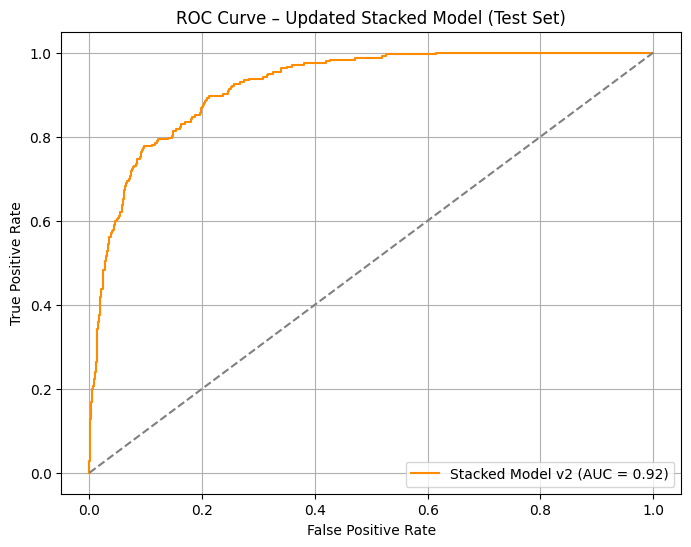

In [186]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize test labels
y_test_binary = label_binarize(y_test, classes=[0, 1]).ravel()

# Get predicted probabilities for positive class
y_proba_stack_v2 = stacking_model_v2.predict_proba(X_test)[:, 1]

# Compute FPR and TPR
fpr_stack_v2, tpr_stack_v2, _ = roc_curve(y_test_binary, y_proba_stack_v2)
roc_auc_stack_v2 = auc(fpr_stack_v2, tpr_stack_v2)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr_stack_v2, tpr_stack_v2, label=f'Stacked Model v2 (AUC = {roc_auc_stack_v2:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – Updated Stacked Model (Test Set)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


### Model summary: 
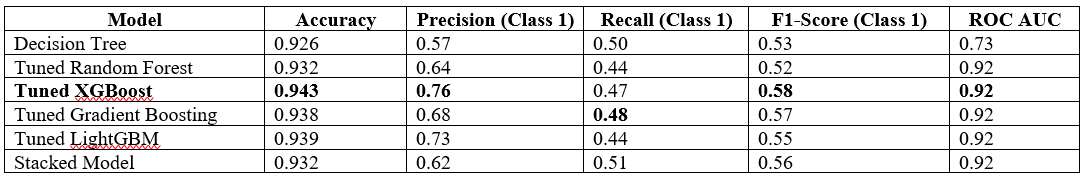

In [188]:
import matplotlib.pyplot as plt

# Sort DataFrame again if needed
importance_df = importance_df.sort_values(by='Importance', ascending=True)  # ascending=True for horizontal bars

# Plot
plt.figure(figsize=(10, 8))
bars = plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')

# Annotate scores on bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.001,              
             bar.get_y() + bar.get_height()/2,  
             f'{width:.4f}',             
             va='center', fontsize=8, color='black')

plt.title('Feature Importance from XGBoost')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


NameError: name 'importance_df' is not defined